<b> 1. Importing the necessary libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas_profiling
import pickle
from sklearn.model_selection import train_test_split

In [6]:
from keras.models import Sequential
from keras.layers import Dense

<b> Setting data path </b>

In [7]:
data_path = '/home/sidharth/Desktop/Capstone_one/data/'

<b> Importing data files </b>

In [8]:
mql_data = pd.read_csv('/home/sidharth/Desktop/Capstone_one/data/mql.csv')
closed_deals = pd.read_csv('/home/sidharth/Desktop/Capstone_one/data/cdd.csv')

In [9]:
sellers = pd.read_csv('/home/sidharth/Desktop/Capstone_one/data/sellers.csv')
geo = pd.read_csv('/home/sidharth/Desktop/Capstone_one/data/geo.csv')

<b> Merging data frames. The cell below merges mql data and close deals on <i>mql_id</i> whose output is chained with another merge on <i> seller_id </i> with sellers

In [10]:
overall_leads = mql_data.merge(closed_deals,how='inner',on='mql_id').merge(sellers,how='inner',on='seller_id')

In [11]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,73f31a40697cc90a86c1273563ac230e,other,f46490624488d3ff7ce78613913a7711,9d12ef1a7eca3ec58c545c678af7869c,068066e24f0c643eb1d089c7dd20cd73,2018-05-16 19:51:05,health_beauty,online_big,eagle,NaN,NaN,NaN,reseller,NaN,0.0,7194,guarulhos,SP
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,b76ef37428e6799c421989521c0e5077,organic_search,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,computers,NaN,NaN,NaN,NaN,NaN,reseller,NaN,0.0,17400,garca,SP
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,email,33dd941c27854f7625b968cc6195a552,a8387c01a09e99ce014107505b92388c,85fc447d336637ba1df43e793199fbc8,2018-03-28 22:42:55,household_utilities,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,29107,vila velha,ES
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,8275,sao paulo,SP


In [12]:
np.random.randn(2,9).shape

(2, 9)

The cell below gives basic information about dataframe. The output of the cell contains 
<ol>
    <b> 
        <li> Number of variables and their names. </li>
        <li> Number of observations. </li>
        <li> Count of numerical features and their names. </li>
        <li> Count of categorical features and their names. </li>
        <li> Count of Boolean features and their names. </li>
        <li> Count of date features and their names. </li>
        <li> Percentage of no null data. </li>
        <li> Percentage of data with less than 30% null. </li>
        <li> Percentage of data with greater than 30% null. </li>
    </b>
  </ol>
  
        

In [13]:
def data_info(df,rem_cols):
    
    df = df.drop(columns=rem_cols)
    
    df_info = pd.DataFrame(np.random.randn(1,9)*12,
                          columns = ['Number of Variables',
                                    'Observations',
                                     'numerical_features',
                                    'categorical_features',
                                    'boolean_features',
                                    'date',
                                    '0% null',
                                    '<30% null',
                                    '>30% null'])
    
    
    df_info.loc[0,'Number of Variables'] = df.shape[1]
    df_info.loc[1,'Number of Variables'] = ','.join(df.columns.to_list())
    
    df_info.loc[0,'Observations'] = df.shape[0]
    df_info.loc[1,'Observations'] = np.nan
    
    df_info.loc[0,'numerical_features'] = df._get_numeric_data().shape[1]
    df_info.loc[1,'numerical_features'] = ','.join(df._get_numeric_data().columns.to_list())
    
    df_info.loc[0,'categorical_features'] = df.select_dtypes(include=['object']).shape[1]
    df_info.loc[1,'categorical_features'] = ','.join(df.select_dtypes(include=['object']).columns.to_list())
     
    df_info.loc[0,'boolean_features'] = df.select_dtypes(include=['bool']).shape[1]
    df_info.loc[1,'boolean_features'] = ','.join(df.select_dtypes(include=['bool']).columns.to_list())
    
    df_info.loc[0,'date'] = df.select_dtypes(include=['datetime64']).shape[1]
    df_info.loc[1,'date'] = ','.join(df.select_dtypes(include=['datetime64']).columns.to_list())
    
    
    null_percent = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_percent.columns = ['percentage']
    print(null_percent)
    
    df_info.loc[0,'0% null']=null_percent[null_percent['percentage']==0].shape[0]*100 / df.shape[1]
    df_info.loc[1,'0% null'] = np.nan
    
    df_info.loc[0,'<30% null']=null_percent[null_percent['percentage']<0.3].shape[0]*100 / df.shape[1]
    df_info.loc[1,'<30% null'] = np.nan
    
    df_info.loc[0,'>30% null']=null_percent[null_percent['percentage']>0.3].shape[0]*100 / df.shape[1]
    df_info.loc[1,'>30% null'] = np.nan
    
    df_info = df_info.T
    df_info.columns = ['val','Feature Names']
    df_info['val']=df_info['val'].astype('int')
    
    return df_info
    
    

In [14]:
data_info(overall_leads,['won_date'])

                               percentage
mql_id                           0.000000
first_contact_date               0.000000
landing_page_id                  0.000000
origin                           0.010526
seller_id                        0.000000
sdr_id                           0.000000
sr_id                            0.000000
business_segment                 0.000000
lead_type                        0.007895
lead_behaviour_profile           0.239474
has_company                      0.986842
has_gtin                         0.986842
average_stock                    0.986842
business_type                    0.007895
declared_product_catalog_size    1.000000
declared_monthly_revenue         0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000


,val,Feature Names
Number of Variables,19,"mql_id,first_contact_date,landing_page_id,orig..."
Observations,380,NaN
numerical_features,3,"declared_product_catalog_size,declared_monthly..."
categorical_features,16,"mql_id,first_contact_date,landing_page_id,orig..."
boolean_features,0,
date,0,
0% null,57,NaN
<30% null,78,NaN
>30% null,21,NaN


<b> The Two cells below convert the <i> won_date and first_contact_date </i> to date time features </b>

In [15]:
overall_leads['first_contact_date']=pd.to_datetime(overall_leads['first_contact_date'])

In [16]:
overall_leads['won_date']=pd.to_datetime(overall_leads['won_date'])

<b> New feature, <i> conversion time </i> taken for each lead </b>

In [17]:
converted_time = overall_leads['won_date'] - overall_leads['first_contact_date']

In [18]:
converted_time

0       5 days 19:58:54
1      63 days 17:27:23
2     267 days 20:17:45
3       1 days 18:04:05
4       4 days 17:01:57
             ...       
375    42 days 19:51:05
376    14 days 21:49:28
377     1 days 22:42:55
378    12 days 12:27:44
379   124 days 21:23:45
Length: 380, dtype: timedelta64[ns]

In [19]:
converted_time = converted_time/np.timedelta64(1,'D')

In [20]:
converted_time

0        5.832569
1       63.727350
2      267.845660
3        1.752836
4        4.709688
          ...    
375     42.827141
376     14.909352
377      1.946470
378     12.519259
379    124.891493
Length: 380, dtype: float64

In [21]:
overall_leads['conversion_time']=converted_time

In [22]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,5.832569
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS,63.727350
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,...,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP,267.845660
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,...,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG,1.752836
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,...,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS,4.709688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,73f31a40697cc90a86c1273563ac230e,other,f46490624488d3ff7ce78613913a7711,9d12ef1a7eca3ec58c545c678af7869c,068066e24f0c643eb1d089c7dd20cd73,2018-05-16 19:51:05,health_beauty,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,7194,guarulhos,SP,42.827141
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,b76ef37428e6799c421989521c0e5077,organic_search,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,computers,NaN,...,NaN,NaN,NaN,reseller,NaN,0.0,17400,garca,SP,14.909352
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,email,33dd941c27854f7625b968cc6195a552,a8387c01a09e99ce014107505b92388c,85fc447d336637ba1df43e793199fbc8,2018-03-28 22:42:55,household_utilities,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,29107,vila velha,ES,1.946470
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,8275,sao paulo,SP,12.519259


In [23]:
data_info(overall_leads,rem_cols=['conversion_time'])

                               percentage
mql_id                           0.000000
first_contact_date               0.000000
landing_page_id                  0.000000
origin                           0.010526
seller_id                        0.000000
sdr_id                           0.000000
sr_id                            0.000000
won_date                         0.000000
business_segment                 0.000000
lead_type                        0.007895
lead_behaviour_profile           0.239474
has_company                      0.986842
has_gtin                         0.986842
average_stock                    0.986842
business_type                    0.007895
declared_product_catalog_size    1.000000
declared_monthly_revenue         0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000


,val,Feature Names
Number of Variables,20,"mql_id,first_contact_date,landing_page_id,orig..."
Observations,380,NaN
numerical_features,3,"declared_product_catalog_size,declared_monthly..."
categorical_features,15,"mql_id,landing_page_id,origin,seller_id,sdr_id..."
boolean_features,0,
date,2,"first_contact_date,won_date"
0% null,60,NaN
<30% null,80,NaN
>30% null,20,NaN


In [24]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [25]:
exp = overall_leads['landing_page_id']

In [26]:
overall_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         380 non-null    object        
 1   first_contact_date             380 non-null    datetime64[ns]
 2   landing_page_id                380 non-null    object        
 3   origin                         376 non-null    object        
 4   seller_id                      380 non-null    object        
 5   sdr_id                         380 non-null    object        
 6   sr_id                          380 non-null    object        
 7   won_date                       380 non-null    datetime64[ns]
 8   business_segment               380 non-null    object        
 9   lead_type                      377 non-null    object        
 10  lead_behaviour_profile         289 non-null    object        
 11  has_company        

<b>Using sklearn's label encoder to encode <i> landing_page_id , seller_id, sr_id , sdr_id </i> as the id's are hashed and tough to visualize </b>

In [27]:
from sklearn import preprocessing

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
le.fit_transform(overall_leads['landing_page_id'])

array([53,  7, 49, 26, 56,  0, 55, 13,  7, 16, 13, 13, 56, 13, 46, 26, 66,
       13,  2,  2, 13, 49, 56, 36, 43, 46, 31, 26, 56, 69, 13, 13, 56, 12,
       27, 31, 13, 10, 56, 56, 13, 25, 13, 13, 56, 62, 13, 56, 62, 71, 50,
       34, 63, 17, 13, 62, 56, 26, 26, 13, 31, 72, 13, 69, 26, 26, 62, 56,
       26, 17, 62, 20, 56, 13, 26, 37, 14, 35, 26, 13, 64, 13, 13, 26, 59,
       57, 56, 56, 56, 43, 56, 46, 13, 56, 50, 56, 56, 33, 26, 56, 13, 43,
       56, 68, 56, 13, 31, 23, 13, 24, 26, 69, 13, 13, 55, 32, 56, 40, 26,
       46, 62, 46, 55, 46, 62, 26, 26, 13, 13, 18, 56, 56, 56, 13, 26, 31,
       13, 56, 19, 14, 13, 13, 13, 69, 56, 56, 56, 13, 13, 62, 30, 69, 62,
       13, 56, 43, 73, 13, 73, 13, 37, 13, 62, 26, 62, 13, 56, 56, 56, 13,
       14, 56, 56, 13, 13, 26, 13, 26, 13, 62, 46, 43, 62, 56,  0, 62, 46,
       13, 13, 31, 38, 29, 56, 58, 62, 13, 56, 74, 13, 56, 56, 56, 17, 56,
       13, 62, 50, 14, 62, 56, 62, 62, 56, 13, 64, 18, 56, 73, 22, 26, 45,
       44, 62, 49, 18, 19

In [30]:
overall_leads.columns

Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin',
       'seller_id', 'sdr_id', 'sr_id', 'won_date', 'business_segment',
       'lead_type', 'lead_behaviour_profile', 'has_company', 'has_gtin',
       'average_stock', 'business_type', 'declared_product_catalog_size',
       'declared_monthly_revenue', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'conversion_time'],
      dtype='object')

In [31]:
def label_encode(df,cols):
    le_list = {}
    for i,col in enumerate(cols):
        le = preprocessing.LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_list[col]=le
    
    return(df,le_list)
    
    
    

In [32]:
overall_leads,le_lis = label_encode(overall_leads,['landing_page_id','seller_id','sdr_id','sr_id'])

In [33]:
with open('/home/sidharth/Desktop/Capstone_one/data/label_econding_list.pkl','wb') as f:
    pickle.dump(le_lis,f)

In [34]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,53,organic_search,60,12,6,2018-02-26 19:58:54,pet,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,5.832569
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,7,organic_search,143,13,8,2018-06-05 17:27:23,home_appliances,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS,63.727350
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,49,unknown,359,7,15,2018-07-03 20:17:45,home_appliances,industry,...,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP,267.845660
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,26,organic_search,38,17,4,2018-02-07 18:04:05,health_beauty,online_medium,...,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG,1.752836
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,56,unknown,95,4,6,2018-04-17 17:01:57,health_beauty,offline,...,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS,4.709688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,40,other,368,10,1,2018-05-16 19:51:05,health_beauty,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,7194,guarulhos,SP,42.827141
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,56,organic_search,185,5,6,2018-05-07 21:49:28,computers,NaN,...,NaN,NaN,NaN,reseller,NaN,0.0,17400,garca,SP,14.909352
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,60,email,73,12,9,2018-03-28 22:42:55,household_utilities,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,29107,vila velha,ES,1.946470
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,31,social,291,5,6,2018-04-20 12:27:44,health_beauty,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,8275,sao paulo,SP,12.519259


<b> Filling Null values for columns that have null. </b>  
<b> The appropriate mean or median is used for numerical and highest occuring category for categorical </b>

In [35]:
overall_leads['origin'] = overall_leads['origin'].fillna(overall_leads['origin'].value_counts()[0])

In [36]:
overall_leads['lead_type'] = overall_leads['lead_type'].fillna(overall_leads['lead_type'].value_counts()[0])

In [37]:
overall_leads['lead_behaviour_profile'].value_counts() # Need to ask how to fill the null values in this.

cat           184
eagle          50
wolf           43
shark          10
eagle, cat      1
cat, wolf       1
Name: lead_behaviour_profile, dtype: int64

In [38]:
overall_leads['business_type']=overall_leads['business_type'].fillna(overall_leads['business_type'].value_counts()[0])

In [39]:
overall_leads['sdr_id'].value_counts()

7     70
0     44
12    34
8     32
10    31
11    30
14    24
5     21
1     20
13    15
15    15
17    15
4     14
2      9
9      2
16     2
6      1
3      1
Name: sdr_id, dtype: int64

In [40]:
overall_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         380 non-null    object        
 1   first_contact_date             380 non-null    datetime64[ns]
 2   landing_page_id                380 non-null    int64         
 3   origin                         380 non-null    object        
 4   seller_id                      380 non-null    int64         
 5   sdr_id                         380 non-null    int64         
 6   sr_id                          380 non-null    int64         
 7   won_date                       380 non-null    datetime64[ns]
 8   business_segment               380 non-null    object        
 9   lead_type                      380 non-null    object        
 10  lead_behaviour_profile         289 non-null    object        
 11  has_company        

<b> The label encoded features are converted to categorical type </b>

In [41]:
overall_leads['landing_page_id']= overall_leads['landing_page_id'].astype('category')
overall_leads['seller_id'] = overall_leads['seller_id'].astype('category')
overall_leads['sdr_id'] = overall_leads['sdr_id'].astype('category')
overall_leads['sr_id'] = overall_leads['sr_id'].astype('category')


<b> Function below plots categorical features </b>

In [42]:
def plot_categories(df,rem_cols=[]):
    df = df.select_dtypes(include=['category','object'])
    for i,col in enumerate(df.columns):
        if(len(df[col].value_counts()) == df.shape[0]):
            continue
        if(df[col].nunique()<=10):
            plt.figure(i)
            sns.countplot(data=df,x=col)
            plt.xticks(rotation=45)
            plt.title('count of {}'.format(col))
            plt.ylim([np.min(df[col].value_counts()),np.max(df[col].value_counts())])
        else:
            
            plt.figure(i)
            #plt.figure().text('Check')
            #sns.countplot(data=df[col].value_counts()[:10],x=df[col].value_counts().index[:10])
            df[col].value_counts()[:10].plot(kind='bar')
            plt.xticks(rotation=45)
            plt.title('count of {}'.format(col))
            plt.ylim([np.min(df[col].value_counts()),np.max(df[col].value_counts())])
            

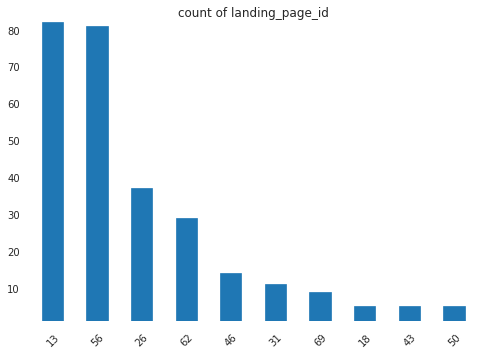

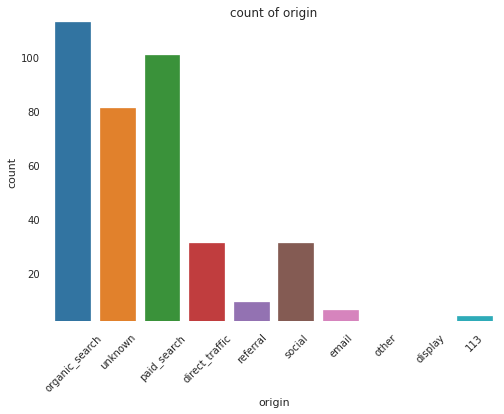

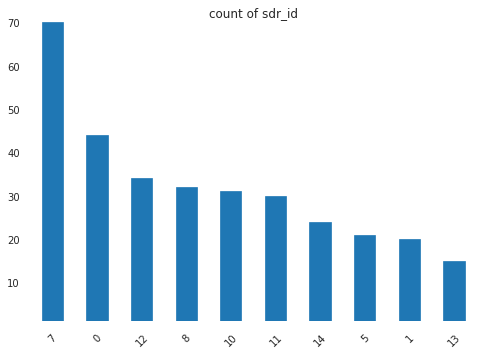

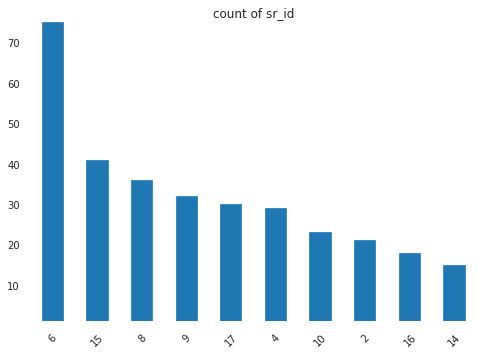

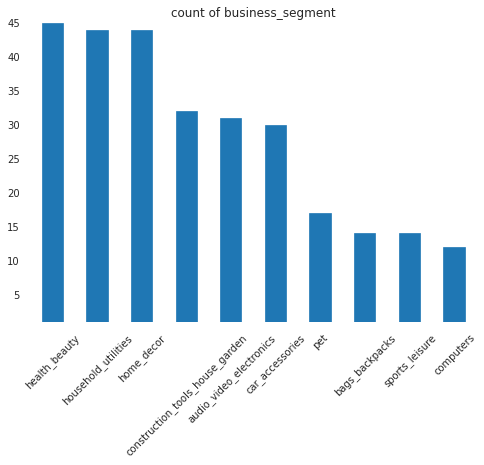

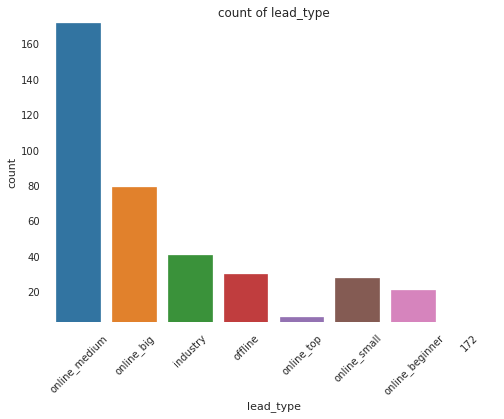

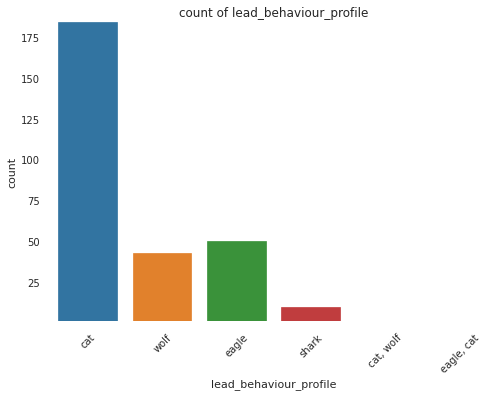

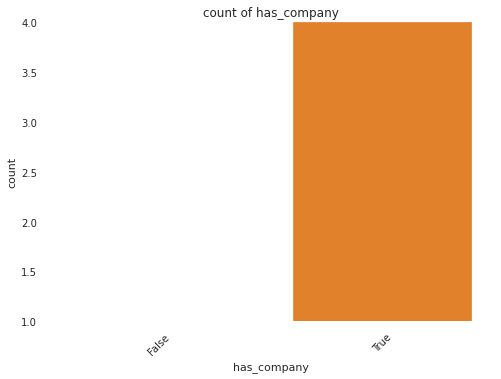

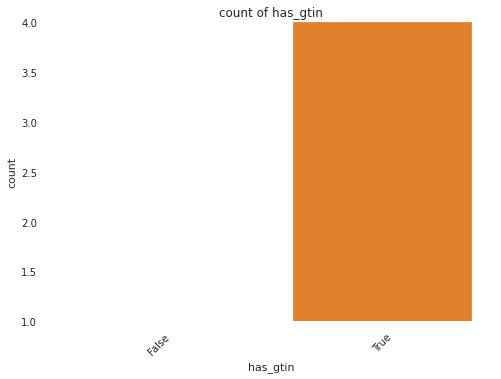

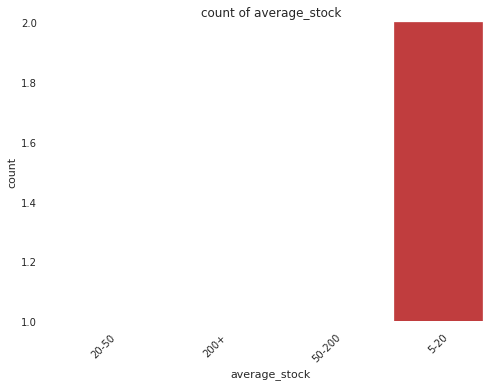

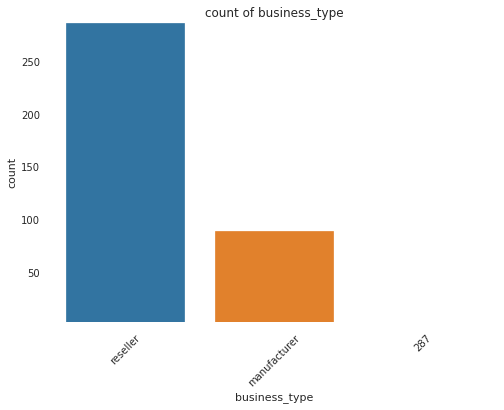

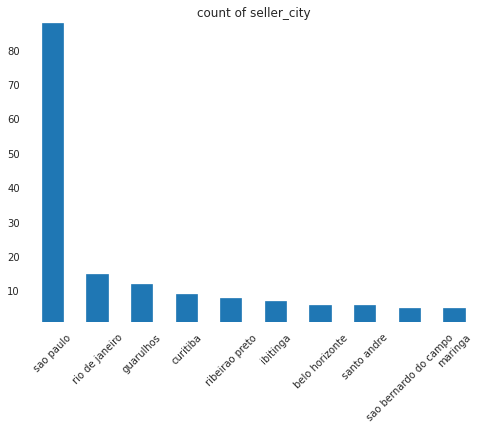

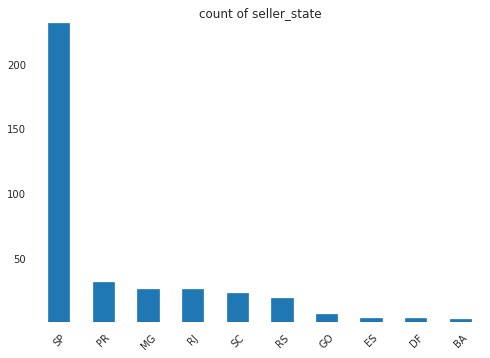

In [43]:
plot_categories(overall_leads)

<b> Plotting the response variable. </b>

Text(0, 0.5, 'Probability density')

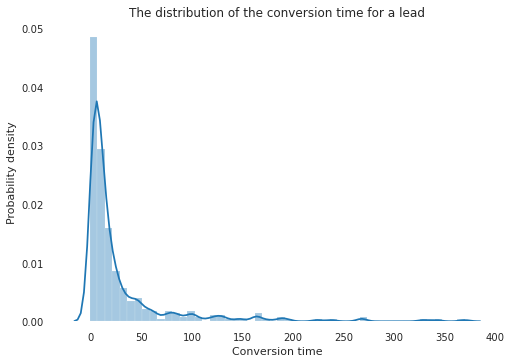

In [44]:
fig= plt.figure()
sns.distplot(overall_leads['conversion_time'])
plt.title('The distribution of the conversion time for a lead')
plt.xlabel('Conversion time')
plt.ylabel('Probability density')

<b> Removing columns without value. </b>

In [45]:
overall_leads.drop(['has_company','has_gtin','average_stock','declared_product_catalog_size'],axis=1,inplace=True)

In [46]:
overall_leads['lead_behaviour_profile'] = overall_leads['lead_behaviour_profile'].fillna('cat')

In [47]:
overall_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    380 non-null    object        
 1   first_contact_date        380 non-null    datetime64[ns]
 2   landing_page_id           380 non-null    category      
 3   origin                    380 non-null    object        
 4   seller_id                 380 non-null    category      
 5   sdr_id                    380 non-null    category      
 6   sr_id                     380 non-null    category      
 7   won_date                  380 non-null    datetime64[ns]
 8   business_segment          380 non-null    object        
 9   lead_type                 380 non-null    object        
 10  lead_behaviour_profile    380 non-null    object        
 11  business_type             380 non-null    object        
 12  declared_monthly_reven

In [48]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,53,organic_search,60,12,6,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,30421,belo horizonte,MG,5.832569
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,7,organic_search,143,13,8,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,93542,novo hamburgo,RS,63.727350
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,49,unknown,359,7,15,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,11015,santos,SP,267.845660
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,26,organic_search,38,17,4,2018-02-07 18:04:05,health_beauty,online_medium,cat,manufacturer,0.0,30668,belo horizonte,MG,1.752836
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,56,unknown,95,4,6,2018-04-17 17:01:57,health_beauty,offline,cat,manufacturer,0.0,92010,canoas,RS,4.709688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,40,other,368,10,1,2018-05-16 19:51:05,health_beauty,online_big,eagle,reseller,0.0,7194,guarulhos,SP,42.827141
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,56,organic_search,185,5,6,2018-05-07 21:49:28,computers,172,cat,reseller,0.0,17400,garca,SP,14.909352
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,60,email,73,12,9,2018-03-28 22:42:55,household_utilities,online_medium,cat,reseller,0.0,29107,vila velha,ES,1.946470
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,31,social,291,5,6,2018-04-20 12:27:44,health_beauty,online_medium,cat,reseller,0.0,8275,sao paulo,SP,12.519259


In [49]:
demo = overall_leads[:]

<b> The cell below calculates the number of active leads for each sales development representative at the time of having the lead. i.e between the first contact date and won date of any one lead, how many other leads for the same sales development representative exist. There can be 16 combinations that arise and all of them are taken care of. </b>

In [50]:
new_df_2 = pd.DataFrame()
for index_val in demo['sdr_id'].value_counts().index.values:
    check = demo[demo['sdr_id']==index_val]
    for i in range(check.shape[0]):
        count = 0
        a = check.iloc[i,1]
        b = check.iloc[i,7]
        for c,d in zip(check['first_contact_date'],check['won_date']):
            if((a<c)&(a<d)&(b<c)&(b<d)):
                count = count+0
        
            elif((a<c)&(a<d)&(b<c)&(b>d)):
                count = count + 0 
        
            elif((a<=c)&(a<=d)&(b>=c)&(b<=d)):
                count = count + 1
        
            elif((a<=c)&(a<=d)&(b>=c)&(b>=d)):
                count = count + 1
        
            elif((a<c)&(a>d)&(b<c)&(b<d)):
                count = count + 0
        
            elif((a<c)&(a>d)&(b<c)&(b>d)):
                 count = count + 0
        
            elif((a<c)&(a>d)&(b>c)&(b<d)):
                count = count + 0
        
            elif((a<c)&(a>d)&(b>c)&(b>d)):
                count = count + 0
            
            elif((a>c)&(a<d)&(b<c)&(b<d)):
                count = count + 0
            
            elif((a>c)&(a<d)&(b<c)&(b>d)):
                count = count + 0
            
            elif((a>=c)&(a<=d)&(b>=c)&(b<=d)):
                count = count + 1
            
            elif((a>=c)&(a<=d)&(b>=c)&(b>=d)):
                count = count + 1
            
            elif((a>c)&(a>d)&(b<c)&(b<d)):
                count = count + 0
            
            elif((a>c)&(a>d)&(b<c)&(b>d)):
                count = count + 0
        
            elif((a>c)&(a>d)&(b>c)&(b<d)):
                count = count + 0
            
            elif((a>c)&(a>d)&(b>c)&(b>d)):
                count = count +0
        
        count = count -1
            
        check.loc[check.index[i],'sdr_load'] = count
    new_df_2 = pd.concat([new_df_2,check],axis=0)

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [51]:
new_df_2

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,49,unknown,359,7,15,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,11015,santos,SP,267.845660,69.0
15,85e43237b3fb87d881c757f44f1b0357,2018-03-26,26,paid_search,120,7,17,2018-04-06 20:52:54,household_utilities,industry,shark,reseller,0.0,81200,curitiba,PR,11.870069,24.0
21,d955b97b28c2966211c9de2fe22fefbd,2018-01-04,49,direct_traffic,50,7,8,2018-02-06 15:46:14,bed_bath_table,online_beginner,cat,manufacturer,0.0,14940,ibitinga,SP,33.657106,23.0
25,d25814a309be54d1d2279a4ff921ea28,2018-02-25,46,social,65,7,12,2018-04-11 03:00:00,home_decor,online_big,cat,reseller,0.0,76400,uruacu,GO,45.125000,35.0
31,415ae4e297c08fd8790a5b1e1ba8482e,2018-04-11,13,paid_search,10,7,16,2018-04-27 13:35:00,home_decor,online_medium,wolf,manufacturer,0.0,31110,belo horizonte,MG,16.565972,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,245e57794c369c8617378e285ee9755c,2018-03-22,56,unknown,375,9,15,2018-07-26 17:03:01,music_instruments,online_big,eagle,reseller,0.0,58073,joao pessoa,PB,126.710428,1.0
91,57e65b6fc1f2e47c402deeee25bba1aa,2017-11-27,46,social,134,16,4,2018-01-10 18:15:06,baby,online_small,cat,reseller,0.0,15085,sao jose do rio preto,SP,44.760486,1.0
302,dedd5db8f760f36dd41fba0d5e94308b,2017-11-21,26,paid_search,90,16,0,2017-12-11 18:07:26,food_supplement,industry,cat,manufacturer,0.0,29260,domingos martins,ES,20.755162,1.0
345,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,0.0,20735,rio de janeiro,RJ,341.514653,0.0


In [52]:
new_df_2['sdr_load'].describe()

count    380.000000
mean      13.623684
std       10.109061
min        0.000000
25%        8.000000
50%       11.000000
75%       16.000000
max       69.000000
Name: sdr_load, dtype: float64

In [53]:
new_df_2[:]

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,49,unknown,359,7,15,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,11015,santos,SP,267.845660,69.0
15,85e43237b3fb87d881c757f44f1b0357,2018-03-26,26,paid_search,120,7,17,2018-04-06 20:52:54,household_utilities,industry,shark,reseller,0.0,81200,curitiba,PR,11.870069,24.0
21,d955b97b28c2966211c9de2fe22fefbd,2018-01-04,49,direct_traffic,50,7,8,2018-02-06 15:46:14,bed_bath_table,online_beginner,cat,manufacturer,0.0,14940,ibitinga,SP,33.657106,23.0
25,d25814a309be54d1d2279a4ff921ea28,2018-02-25,46,social,65,7,12,2018-04-11 03:00:00,home_decor,online_big,cat,reseller,0.0,76400,uruacu,GO,45.125000,35.0
31,415ae4e297c08fd8790a5b1e1ba8482e,2018-04-11,13,paid_search,10,7,16,2018-04-27 13:35:00,home_decor,online_medium,wolf,manufacturer,0.0,31110,belo horizonte,MG,16.565972,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,245e57794c369c8617378e285ee9755c,2018-03-22,56,unknown,375,9,15,2018-07-26 17:03:01,music_instruments,online_big,eagle,reseller,0.0,58073,joao pessoa,PB,126.710428,1.0
91,57e65b6fc1f2e47c402deeee25bba1aa,2017-11-27,46,social,134,16,4,2018-01-10 18:15:06,baby,online_small,cat,reseller,0.0,15085,sao jose do rio preto,SP,44.760486,1.0
302,dedd5db8f760f36dd41fba0d5e94308b,2017-11-21,26,paid_search,90,16,0,2017-12-11 18:07:26,food_supplement,industry,cat,manufacturer,0.0,29260,domingos martins,ES,20.755162,1.0
345,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,0.0,20735,rio de janeiro,RJ,341.514653,0.0


In [54]:
demo = new_df_2[:]

In [55]:
demo.shape

(380, 18)

<b> The same code that was done for sdr is done for sr </b>

In [56]:
new_df_3 = pd.DataFrame()
for index_val in demo['sr_id'].value_counts().index.values:
    check = demo[demo['sr_id']==index_val]
    for i in range(check.shape[0]):
        count = 0
        a = check.iloc[i,1]
        b = check.iloc[i,7]
        for c,d in zip(check['first_contact_date'],check['won_date']):
            if((a<c)&(a<d)&(b<c)&(b<d)):
                count = count+0
        
            elif((a<c)&(a<d)&(b<c)&(b>d)):
                count = count + 0 
        
            elif((a<=c)&(a<=d)&(b>=c)&(b<=d)):
                count = count + 1
        
            elif((a<=c)&(a<=d)&(b>=c)&(b>=d)):
                count = count + 1
        
            elif((a<c)&(a>d)&(b<c)&(b<d)):
                count = count + 0
        
            elif((a<c)&(a>d)&(b<c)&(b>d)):
                 count = count + 0
        
            elif((a<c)&(a>d)&(b>c)&(b<d)):
                count = count + 0
        
            elif((a<c)&(a>d)&(b>c)&(b>d)):
                count = count + 0
            
            elif((a>c)&(a<d)&(b<c)&(b<d)):
                count = count + 0
            
            elif((a>c)&(a<d)&(b<c)&(b>d)):
                count = count + 0
            
            elif((a>=c)&(a<=d)&(b>=c)&(b<=d)):
                count = count + 1
            
            elif((a>=c)&(a<=d)&(b>=c)&(b>=d)):
                count = count + 1
            
            elif((a>c)&(a>d)&(b<c)&(b<d)):
                count = count + 0
            
            elif((a>c)&(a>d)&(b<c)&(b>d)):
                count = count + 0
        
            elif((a>c)&(a>d)&(b>c)&(b<d)):
                count = count + 0
            
            elif((a>c)&(a>d)&(b>c)&(b>d)):
                count = count +0
        
        count = count -1
            
        check.loc[check.index[i],'sr_load'] = count
    new_df_3 = pd.concat([new_df_3,check],axis=0)

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [57]:
new_df_3['sr_load'].describe()

count    380.000000
mean      10.155263
std        9.208783
min        0.000000
25%        5.000000
50%        8.000000
75%       12.000000
max       74.000000
Name: sr_load, dtype: float64

In [58]:
overall_leads=new_df_3[:]

In [59]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
94,aadd608980d2f5f7ee3942cc912eef00,2018-05-31,50,organic_search,41,7,6,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",reseller,0.0,30421,belo horizonte,MG,20.516782,6.0,5.0
122,5bee2861956d76fe35e91c33bc4a81b3,2018-03-16,55,paid_search,336,7,6,2018-03-26 20:08:26,bags_backpacks,online_small,eagle,manufacturer,0.0,3282,sao paulo,SP,10.839190,20.0,14.0
123,37d92d59a2b02e0256aa1d2bddcfa50d,2018-01-07,46,social,151,7,6,2018-06-19 19:54:25,household_utilities,online_medium,cat,manufacturer,0.0,80510,curitiba,PR,163.829456,69.0,74.0
182,e866f5b284008f65db1641dae437f9c2,2018-01-20,62,organic_search,324,7,6,2018-01-30 11:33:40,toys,online_medium,cat,reseller,0.0,3562,sao paulo,SP,10.481713,18.0,17.0
199,115f08592f4c2bb29013efbbc46608fc,2018-01-15,56,unknown,379,7,6,2018-02-14 11:48:29,construction_tools_house_garden,online_big,cat,reseller,0.0,7091,guarulhos,SP,30.492002,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,8d4af10effffa338cc97d3ef4b2507dd,2018-03-28,5,unknown,115,4,1,2018-05-09 13:17:12,health_beauty,offline,eagle,reseller,0.0,95840,triunfo,RS,42.553611,8.0,3.0
301,f487c050e3c1f3c31f85b9f818ccc0c2,2018-03-29,41,social,112,5,3,2018-07-24 19:56:07,home_decor,online_big,cat,reseller,0.0,3963,sao paulo,SP,117.830637,20.0,1.0
247,63d196328512c582293ce6c845521bb6,2017-10-26,27,paid_search,44,2,3,2018-07-20 18:18:14,computers,online_medium,eagle,reseller,0.0,25850,paraiba do sul,RJ,267.762662,8.0,1.0
345,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,0.0,20735,rio de janeiro,RJ,341.514653,0.0,0.0


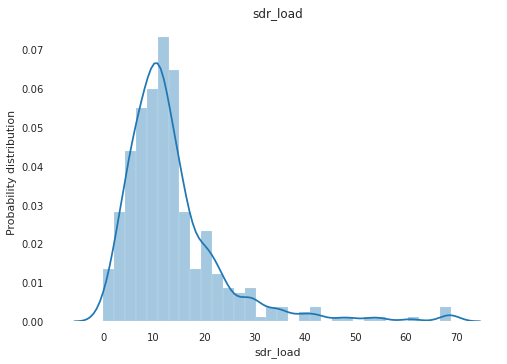

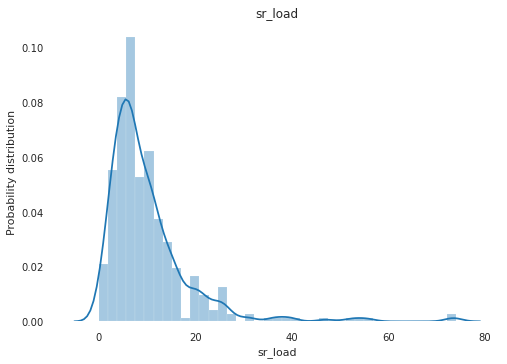

In [60]:
for i in ['sdr_load','sr_load']:
    plt.figure(i)
    sns.distplot(overall_leads[i])
    plt.xlabel(str(i))
    plt.ylabel('Probability distribution')
    plt.title(str(i))

In [61]:
overall_leads.drop('declared_monthly_revenue',axis=1,inplace=True)

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
94,aadd608980d2f5f7ee3942cc912eef00,2018-05-31,50,organic_search,41,7,6,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",reseller,30421,belo horizonte,MG,20.516782,6.0,5.0
122,5bee2861956d76fe35e91c33bc4a81b3,2018-03-16,55,paid_search,336,7,6,2018-03-26 20:08:26,bags_backpacks,online_small,eagle,manufacturer,3282,sao paulo,SP,10.839190,20.0,14.0
123,37d92d59a2b02e0256aa1d2bddcfa50d,2018-01-07,46,social,151,7,6,2018-06-19 19:54:25,household_utilities,online_medium,cat,manufacturer,80510,curitiba,PR,163.829456,69.0,74.0
182,e866f5b284008f65db1641dae437f9c2,2018-01-20,62,organic_search,324,7,6,2018-01-30 11:33:40,toys,online_medium,cat,reseller,3562,sao paulo,SP,10.481713,18.0,17.0
199,115f08592f4c2bb29013efbbc46608fc,2018-01-15,56,unknown,379,7,6,2018-02-14 11:48:29,construction_tools_house_garden,online_big,cat,reseller,7091,guarulhos,SP,30.492002,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,8d4af10effffa338cc97d3ef4b2507dd,2018-03-28,5,unknown,115,4,1,2018-05-09 13:17:12,health_beauty,offline,eagle,reseller,95840,triunfo,RS,42.553611,8.0,3.0
301,f487c050e3c1f3c31f85b9f818ccc0c2,2018-03-29,41,social,112,5,3,2018-07-24 19:56:07,home_decor,online_big,cat,reseller,3963,sao paulo,SP,117.830637,20.0,1.0
247,63d196328512c582293ce6c845521bb6,2017-10-26,27,paid_search,44,2,3,2018-07-20 18:18:14,computers,online_medium,eagle,reseller,25850,paraiba do sul,RJ,267.762662,8.0,1.0
345,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,20735,rio de janeiro,RJ,341.514653,0.0,0.0


In [63]:
import scipy.stats
def check_normality(df,cols):
    #normal_check_df = pd.DataFrame(np.random.randn(len(cols),4),columns=['Parameter Name','Test Statistic','p-value','is_normal'])
    normal_check_df = pd.DataFrame(np.random.randn(len(cols),4)*12,columns=['Parameter Name','Test Statistic','p-value','is_normal'])
    
    
    
    for i,col in enumerate(cols):
        #print(i)
        test_score,p_val=stats.normaltest(df[col])
        
        normal_check_df.loc[normal_check_df.index[i],'Parameter Name'] = str(col)
        normal_check_df.loc[normal_check_df.index[i],'Test Statistic'] = test_score
        normal_check_df.loc[normal_check_df.index[i],'p-value'] = p_val
        normal_check_df.loc[normal_check_df.index[i],'is_normal'] = 0 if p_val<0.05 else 1
        #print(normal_check_df)
        
    return(normal_check_df)
    

In [64]:
check_normal=check_normality(overall_leads,['sr_load','sdr_load','conversion_time'])

In [65]:
check_normal

,Parameter Name,Test Statistic,p-value,is_normal
0,sr_load,292.915524,2.478575e-64,0.0
1,sdr_load,223.754489,2.584223e-49,0.0
2,conversion_time,314.802572,4.380160e-69,0.0


In [66]:
copy = overall_leads.copy()

<b> Removing row with conversion_time negative as this is cannot be negative </b>

In [67]:
overall_leads[overall_leads['conversion_time']<0]

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
308,b91cf8812365f50ff4bda4bcd6206b05,2018-03-08,27,organic_search,136,12,4,2018-03-06 19:38:55,health_beauty,online_big,cat,reseller,5302,sao paulo,SP,-1.181308,5.0,4.0


In [68]:
overall_leads= overall_leads.reset_index()

In [69]:
overall_leads.drop('index',inplace=True,axis=1)

In [70]:
overall_leads[overall_leads['conversion_time']<0]

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
226,b91cf8812365f50ff4bda4bcd6206b05,2018-03-08,27,organic_search,136,12,4,2018-03-06 19:38:55,health_beauty,online_big,cat,reseller,5302,sao paulo,SP,-1.181308,5.0,4.0


In [71]:
overall_leads = overall_leads.drop(overall_leads.index[226],axis=0)

In [72]:
stats.normaltest(np.log(overall_leads['conversion_time']))

NormaltestResult(statistic=1.7321314215189565, pvalue=0.4206030724748995)

In [73]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
0,aadd608980d2f5f7ee3942cc912eef00,2018-05-31,50,organic_search,41,7,6,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",reseller,30421,belo horizonte,MG,20.516782,6.0,5.0
1,5bee2861956d76fe35e91c33bc4a81b3,2018-03-16,55,paid_search,336,7,6,2018-03-26 20:08:26,bags_backpacks,online_small,eagle,manufacturer,3282,sao paulo,SP,10.839190,20.0,14.0
2,37d92d59a2b02e0256aa1d2bddcfa50d,2018-01-07,46,social,151,7,6,2018-06-19 19:54:25,household_utilities,online_medium,cat,manufacturer,80510,curitiba,PR,163.829456,69.0,74.0
3,e866f5b284008f65db1641dae437f9c2,2018-01-20,62,organic_search,324,7,6,2018-01-30 11:33:40,toys,online_medium,cat,reseller,3562,sao paulo,SP,10.481713,18.0,17.0
4,115f08592f4c2bb29013efbbc46608fc,2018-01-15,56,unknown,379,7,6,2018-02-14 11:48:29,construction_tools_house_garden,online_big,cat,reseller,7091,guarulhos,SP,30.492002,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8d4af10effffa338cc97d3ef4b2507dd,2018-03-28,5,unknown,115,4,1,2018-05-09 13:17:12,health_beauty,offline,eagle,reseller,95840,triunfo,RS,42.553611,8.0,3.0
376,f487c050e3c1f3c31f85b9f818ccc0c2,2018-03-29,41,social,112,5,3,2018-07-24 19:56:07,home_decor,online_big,cat,reseller,3963,sao paulo,SP,117.830637,20.0,1.0
377,63d196328512c582293ce6c845521bb6,2017-10-26,27,paid_search,44,2,3,2018-07-20 18:18:14,computers,online_medium,eagle,reseller,25850,paraiba do sul,RJ,267.762662,8.0,1.0
378,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,20735,rio de janeiro,RJ,341.514653,0.0,0.0


<b> Using log transform to conversion_time for converting it into normal distribution </b>

In [74]:
overall_leads['conversion_time'] = np.log(overall_leads['conversion_time'])

In [75]:
check_normal = check_normality(overall_leads,['sdr_id','sr_id','conversion_time'])

In [76]:
check_normal

,Parameter Name,Test Statistic,p-value,is_normal
0,sdr_id,41.885876,8.027820e-10,0.0
1,sr_id,94.500810,3.015850e-21,0.0
2,conversion_time,1.732131,4.206031e-01,1.0


<b> Converting sdr_load, sr_load using log,sqrt and inverse to check if they can convert it into normal distribution </b>

In [77]:
val = stats.normaltest(np.log(copy['sdr_load'].replace(0.0,0.001)))

In [78]:
val[1] < 0.05

True

In [79]:
copy['sdr_load'] = copy['sdr_load'].replace(0.0,0.01)

In [80]:
copy['sr_load'] = copy['sr_load'].replace(0.0,0.01)

In [81]:
val = stats.normaltest(np.sqrt(copy['sdr_load']))

In [82]:
val[1] < 0.05

True

In [83]:
val = stats.normaltest(1/copy['sdr_load'])

In [84]:
val[1] < 0.05

True

In [85]:
val = stats.boxcox(copy['sdr_load'])

In [86]:
val[1] < 0.05

False

In [87]:
copy['sdr_load'] , fitted_lambda_sdr = stats.boxcox(copy['sdr_load'])

In [88]:
copy['sdr_load']

94     2.417829
122    5.019468
123    8.973011
182    4.749797
199    6.046285
         ...   
314    2.951766
301    5.019468
247    2.951766
345   -2.411996
96     4.142029
Name: sdr_load, Length: 380, dtype: float64

In [89]:
copy['sr_load'] , fitted_lambda_sr = stats.boxcox(copy['sr_load'])

In [90]:
check = check_normality(copy,['sdr_load','sr_load'])

In [91]:
check

,Parameter Name,Test Statistic,p-value,is_normal
0,sdr_load,23.876392,0.000007,0.0
1,sr_load,21.155187,0.000025,0.0


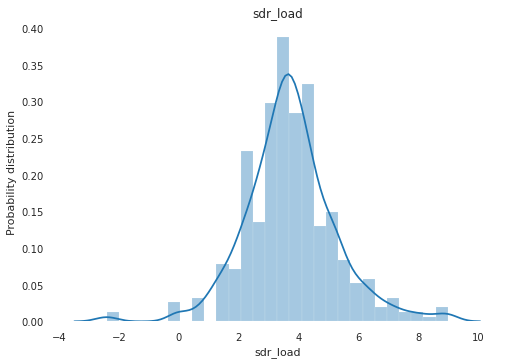

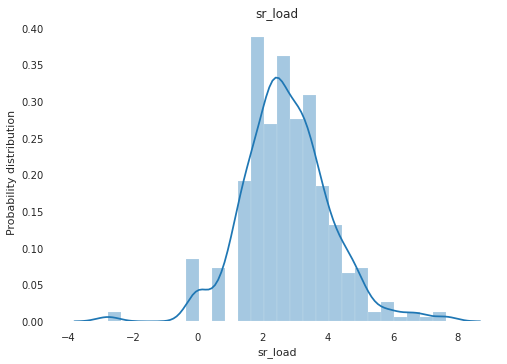

In [92]:
for i in ['sdr_load','sr_load']:
    plt.figure(i)
    sns.distplot(copy[i])
    plt.xlabel(str(i))
    plt.ylabel('Probability distribution')
    plt.title(str(i))

In [93]:
stats.normaltest(copy['sdr_load'])

NormaltestResult(statistic=23.8763915809006, pvalue=6.535930783840697e-06)

In [94]:
stats.normaltest(overall_leads['conversion_time'])

NormaltestResult(statistic=1.7321314215189565, pvalue=0.4206030724748995)

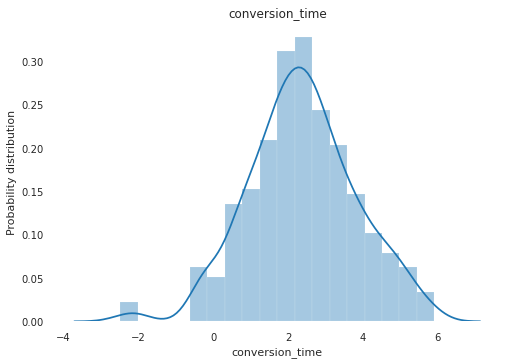

In [95]:
for i in ['conversion_time']:
    plt.figure(i)
    sns.distplot(overall_leads[i])
    plt.xlabel(str(i))
    plt.ylabel('Probability distribution')
    plt.title(str(i))

In [96]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
0,aadd608980d2f5f7ee3942cc912eef00,2018-05-31,50,organic_search,41,7,6,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",reseller,30421,belo horizonte,MG,3.021243,6.0,5.0
1,5bee2861956d76fe35e91c33bc4a81b3,2018-03-16,55,paid_search,336,7,6,2018-03-26 20:08:26,bags_backpacks,online_small,eagle,manufacturer,3282,sao paulo,SP,2.383168,20.0,14.0
2,37d92d59a2b02e0256aa1d2bddcfa50d,2018-01-07,46,social,151,7,6,2018-06-19 19:54:25,household_utilities,online_medium,cat,manufacturer,80510,curitiba,PR,5.098826,69.0,74.0
3,e866f5b284008f65db1641dae437f9c2,2018-01-20,62,organic_search,324,7,6,2018-01-30 11:33:40,toys,online_medium,cat,reseller,3562,sao paulo,SP,2.349632,18.0,17.0
4,115f08592f4c2bb29013efbbc46608fc,2018-01-15,56,unknown,379,7,6,2018-02-14 11:48:29,construction_tools_house_garden,online_big,cat,reseller,7091,guarulhos,SP,3.417464,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8d4af10effffa338cc97d3ef4b2507dd,2018-03-28,5,unknown,115,4,1,2018-05-09 13:17:12,health_beauty,offline,eagle,reseller,95840,triunfo,RS,3.750765,8.0,3.0
376,f487c050e3c1f3c31f85b9f818ccc0c2,2018-03-29,41,social,112,5,3,2018-07-24 19:56:07,home_decor,online_big,cat,reseller,3963,sao paulo,SP,4.769248,20.0,1.0
377,63d196328512c582293ce6c845521bb6,2017-10-26,27,paid_search,44,2,3,2018-07-20 18:18:14,computers,online_medium,eagle,reseller,25850,paraiba do sul,RJ,5.590101,8.0,1.0
378,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,20735,rio de janeiro,RJ,5.833391,0.0,0.0


<b> Bi variate plots, groupby category with conversion time </b>

In [97]:
overall_leads['conversion_time'] = np.exp(overall_leads['conversion_time'])

Text(0.5, 1.0, 'Average conversion time for each lead origin')

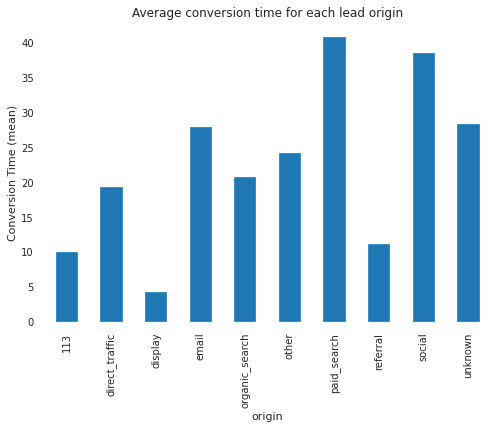

In [98]:
overall_leads.groupby('origin')['conversion_time'].mean().plot(kind='bar')
plt.ylabel('Conversion Time (mean)')
plt.title('Average conversion time for each lead origin')

Text(0.5, 1.0, 'Median conversion time for each lead origin')

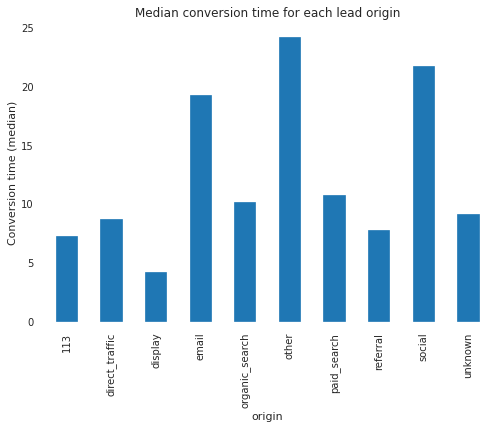

In [99]:
overall_leads.groupby('origin')['conversion_time'].median().plot(kind='bar')
plt.ylabel('Conversion time (median)')
plt.title('Median conversion time for each lead origin')

In [100]:
overall_leads.groupby('landing_page_id')['conversion_time'].mean()   # there are close to 75 unique landing page ids, how to narrow down on this?

landing_page_id
0     100.922228
1      57.177529
2      27.423808
3      50.787350
4      80.879931
         ...    
70    162.671829
71     17.695926
72      7.533206
73     78.773573
74     75.830093
Name: conversion_time, Length: 75, dtype: float64

Text(0.5, 1.0, 'Average conversion time for each sdr')

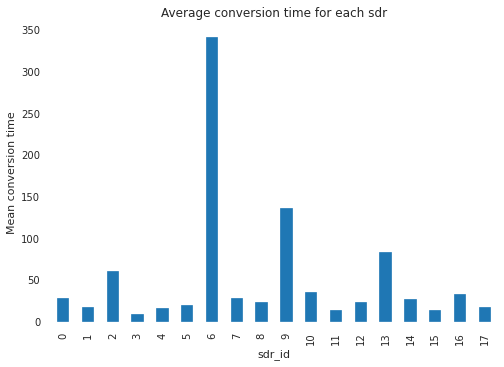

In [101]:
overall_leads.groupby('sdr_id')['conversion_time'].mean().plot(kind='bar')
plt.ylabel('Mean conversion time')
plt.title('Average conversion time for each sdr')

Text(0.5, 1.0, 'Median conversion time for each sdr')

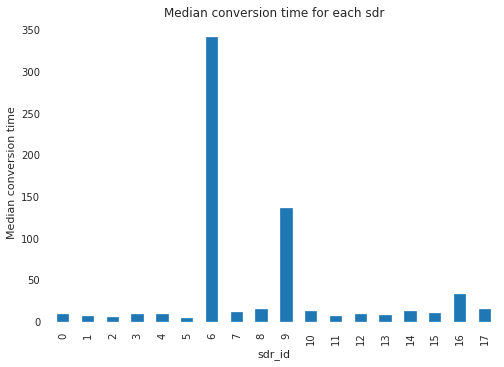

In [102]:
overall_leads.groupby('sdr_id')['conversion_time'].median().plot(kind='bar')
plt.ylabel('Median conversion time')
plt.title('Median conversion time for each sdr')

Text(0.5, 1.0, 'Average conversion time for each sr')

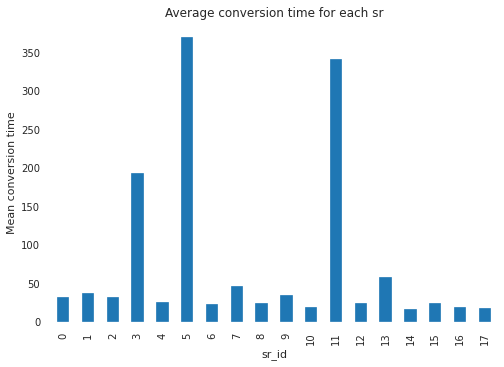

In [103]:
overall_leads.groupby('sr_id')['conversion_time'].mean().plot(kind='bar')
plt.ylabel('Mean conversion time')
plt.title('Average conversion time for each sr')

Text(0.5, 1.0, 'Median conversion time for each sr')

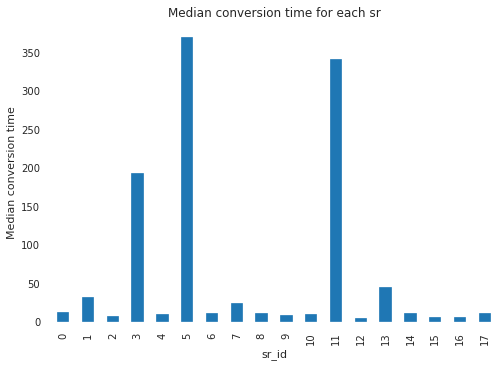

In [104]:
overall_leads.groupby('sr_id')['conversion_time'].median().plot(kind='bar')
plt.ylabel('Median conversion time')
plt.title('Median conversion time for each sr')

In [105]:
def bivariate_plots(df,columns):
    
    for i in columns:
        
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
        
        sns.barplot(x=i,y='conversion_time',data=df,ci=None,ax=ax1)
        ax1.set_title('Mean conversion time for each'+ ' ' + i)
        ax1.set_ylabel('Mean conversion time')
        #ax1.set_xlabel(rotation=45)
        
        
        sns.barplot(x=i,y='conversion_time',data=df,estimator = np.median,ci=None,ax=ax2)
        ax2.set_title('Median conversion time for each'+ ' '+ i)
        ax2.set_ylabel('Median conversion time')
        #ax2.set_xlabel('categories',rotation = 45)
        #plt.subplots_adjust(left=5,right=10,bottom=5,top=10)
        
        

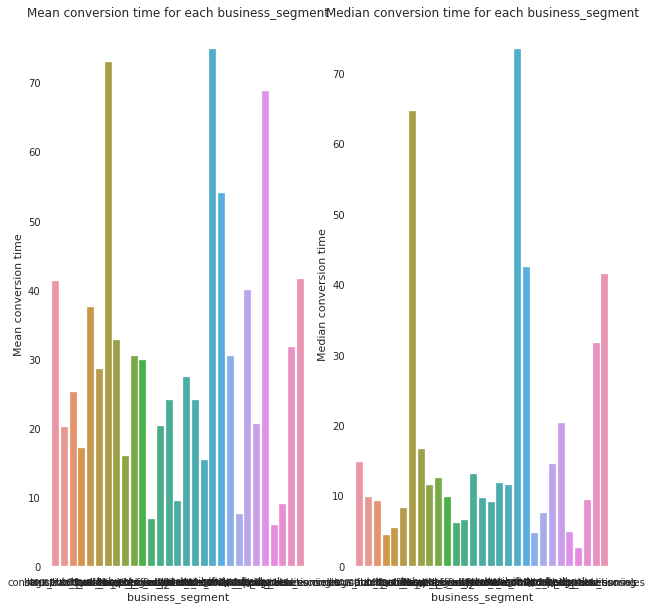

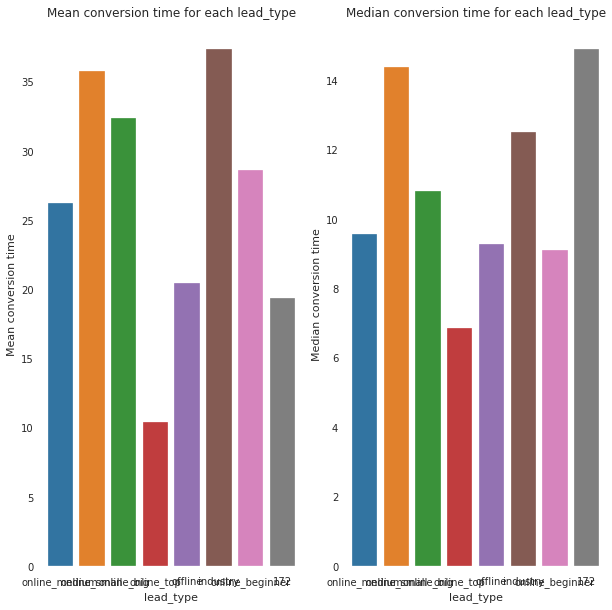

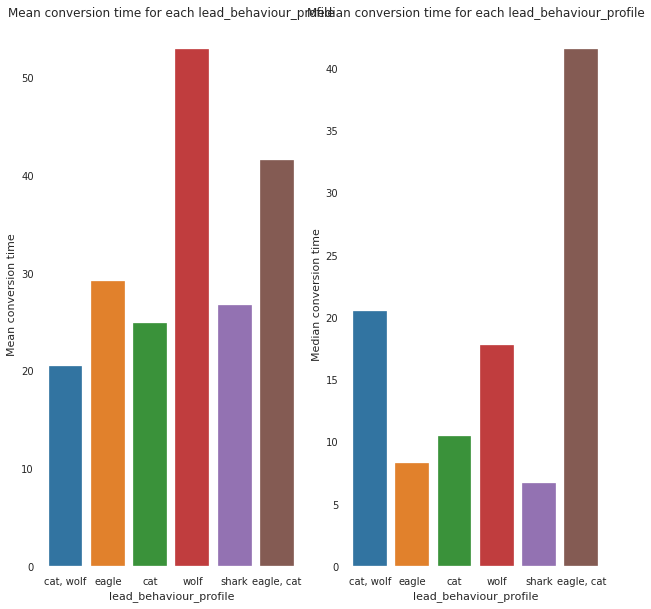

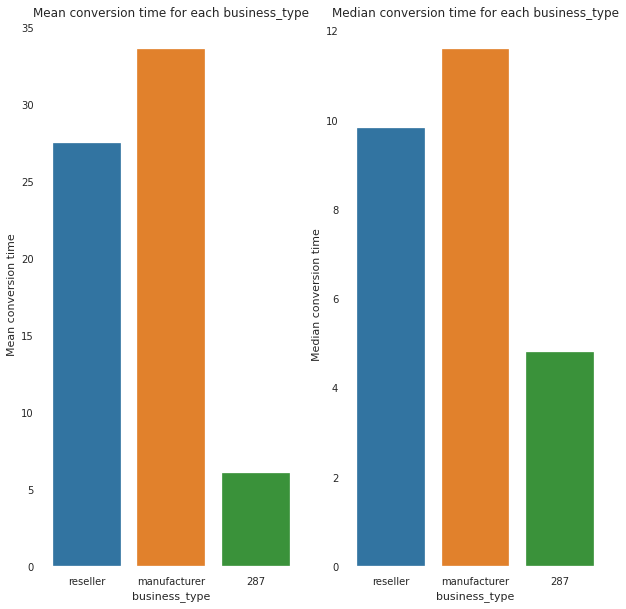

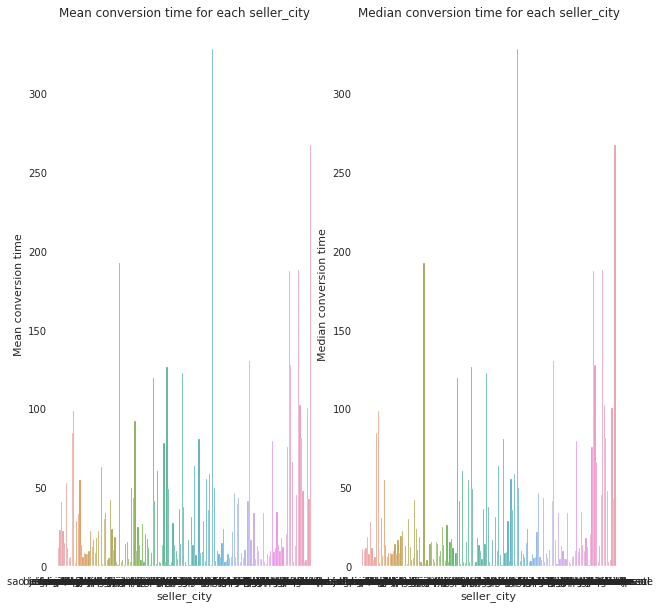

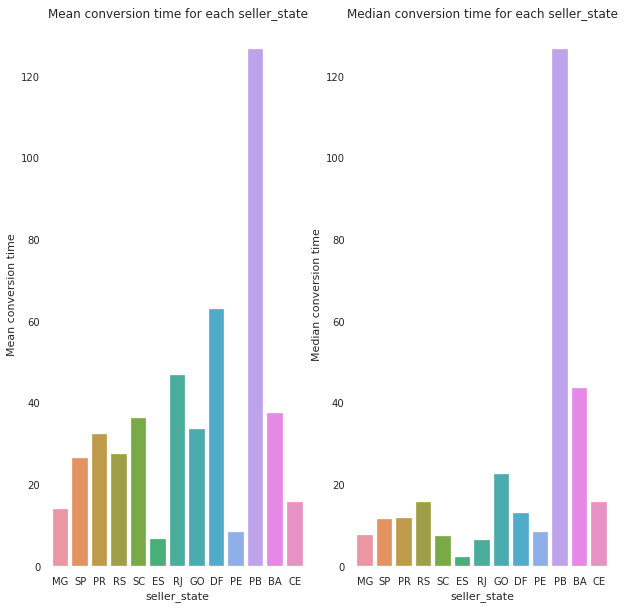

In [106]:
bivariate_plots(overall_leads,['business_segment','lead_type','lead_behaviour_profile','business_type','seller_city','seller_state'])  # ask how to make this pretty

In [107]:
#overall_leads.profile_report()

In [108]:
overall_leads['conversion_time'] = np.log(overall_leads['conversion_time'])

In [109]:
columns_not_required = ['mql_id','seller_id','seller_zip_code_prefix','first_contact_date','won_date','conversion_time']

In [110]:
y = overall_leads['conversion_time']

In [111]:
overall_leads_for_prediction = overall_leads.drop(columns_not_required,axis=1)

In [112]:
overall_leads_for_prediction.to_csv('/home/sidharth/Desktop/Capstone_one/data/master.csv')

In [113]:
overall_leads_with_dummies = pd.get_dummies(overall_leads_for_prediction)

In [114]:
overall_leads_with_dummies

,sdr_load,sr_load,landing_page_id_0,landing_page_id_1,landing_page_id_2,landing_page_id_3,landing_page_id_4,landing_page_id_5,landing_page_id_6,landing_page_id_7,...,seller_state_ES,seller_state_GO,seller_state_MG,seller_state_PB,seller_state_PE,seller_state_PR,seller_state_RJ,seller_state_RS,seller_state_SC,seller_state_SP
0,6.0,5.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,20.0,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,69.0,74.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,18.0,17.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29.0,26.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8.0,3.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
376,20.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
377,8.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
378,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [115]:
x_train,x_test,y_train,y_test = train_test_split(overall_leads_with_dummies,y)

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
clf_linear_reg_initial = LinearRegression()

In [118]:
clf_linear_reg_initial.fit(x_train,y_train)

LinearRegression()

In [119]:
y_pred = clf_linear_reg_initial.predict(x_test)

In [120]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [121]:
mean_squared_error(y_test,y_pred)

2.5843291711775543e+19

In [122]:
important_features = pd.DataFrame(abs(clf_linear_reg_initial.coef_),overall_leads_with_dummies.columns,columns = ['Coefficient'])

In [123]:
important_features.sort_values(by = 'Coefficient',ascending=False)

,Coefficient
landing_page_id_11,4.180173e+10
landing_page_id_10,2.614963e+10
landing_page_id_8,1.190286e+10
seller_city_pocos de caldas,1.074857e+10
seller_city_umuarama,4.323808e+09
...,...
seller_city_pitangueiras,0.000000e+00
seller_city_rio do sul,0.000000e+00
seller_city_sbc,0.000000e+00
seller_city_viana,0.000000e+00


In [124]:
explained_variance_score(y_test,y_pred)

-1.3902839403258477e+19

In [125]:
from joblib import dump,load
dump(clf_linear_reg_initial,'/home/sidharth/Desktop/Capstone_one/models/linear_reg_initial_first.joblib')

['/home/sidharth/Desktop/Capstone_one/models/linear_reg_initial_first.joblib']

In [126]:
important_features.to_csv('/home/sidharth/Desktop/Capstone_one/data/linear_reg_initial_first_features.csv')

In [127]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,seller_zip_code_prefix,seller_city,seller_state,conversion_time,sdr_load,sr_load
0,aadd608980d2f5f7ee3942cc912eef00,2018-05-31,50,organic_search,41,7,6,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",reseller,30421,belo horizonte,MG,3.021243,6.0,5.0
1,5bee2861956d76fe35e91c33bc4a81b3,2018-03-16,55,paid_search,336,7,6,2018-03-26 20:08:26,bags_backpacks,online_small,eagle,manufacturer,3282,sao paulo,SP,2.383168,20.0,14.0
2,37d92d59a2b02e0256aa1d2bddcfa50d,2018-01-07,46,social,151,7,6,2018-06-19 19:54:25,household_utilities,online_medium,cat,manufacturer,80510,curitiba,PR,5.098826,69.0,74.0
3,e866f5b284008f65db1641dae437f9c2,2018-01-20,62,organic_search,324,7,6,2018-01-30 11:33:40,toys,online_medium,cat,reseller,3562,sao paulo,SP,2.349632,18.0,17.0
4,115f08592f4c2bb29013efbbc46608fc,2018-01-15,56,unknown,379,7,6,2018-02-14 11:48:29,construction_tools_house_garden,online_big,cat,reseller,7091,guarulhos,SP,3.417464,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8d4af10effffa338cc97d3ef4b2507dd,2018-03-28,5,unknown,115,4,1,2018-05-09 13:17:12,health_beauty,offline,eagle,reseller,95840,triunfo,RS,3.750765,8.0,3.0
376,f487c050e3c1f3c31f85b9f818ccc0c2,2018-03-29,41,social,112,5,3,2018-07-24 19:56:07,home_decor,online_big,cat,reseller,3963,sao paulo,SP,4.769248,20.0,1.0
377,63d196328512c582293ce6c845521bb6,2017-10-26,27,paid_search,44,2,3,2018-07-20 18:18:14,computers,online_medium,eagle,reseller,25850,paraiba do sul,RJ,5.590101,8.0,1.0
378,680fd12be44eee12aee2a2e023438a5d,2017-08-31,67,paid_search,116,6,11,2018-08-07 12:21:06,home_decor,online_medium,wolf,manufacturer,20735,rio de janeiro,RJ,5.833391,0.0,0.0


In [128]:
y

0      3.021243
1      2.383168
2      5.098826
3      2.349632
4      3.417464
         ...   
375    3.750765
376    4.769248
377    5.590101
378    5.833391
379    5.913098
Name: conversion_time, Length: 379, dtype: float64

In [129]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_city,seller_state,sdr_load,sr_load
0,50,organic_search,7,6,computers,online_medium,"cat, wolf",reseller,belo horizonte,MG,6.0,5.0
1,55,paid_search,7,6,bags_backpacks,online_small,eagle,manufacturer,sao paulo,SP,20.0,14.0
2,46,social,7,6,household_utilities,online_medium,cat,manufacturer,curitiba,PR,69.0,74.0
3,62,organic_search,7,6,toys,online_medium,cat,reseller,sao paulo,SP,18.0,17.0
4,56,unknown,7,6,construction_tools_house_garden,online_big,cat,reseller,guarulhos,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,5,unknown,4,1,health_beauty,offline,eagle,reseller,triunfo,RS,8.0,3.0
376,41,social,5,3,home_decor,online_big,cat,reseller,sao paulo,SP,20.0,1.0
377,27,paid_search,2,3,computers,online_medium,eagle,reseller,paraiba do sul,RJ,8.0,1.0
378,67,paid_search,6,11,home_decor,online_medium,wolf,manufacturer,rio de janeiro,RJ,0.0,0.0


<b> Considering there are many categorical variables, looking to find out which categorical variables are correlated with eachother using Cramers's V test </b>

In [130]:
from scipy.stats import chi2_contingency

In [131]:
def cramers(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

<b> Function to find the cramer statistic value for each categotry </b>

In [132]:
def categorical_correlation(df,test_type='chi2',p_thresh=0.05):
    
    
    
    df = df.select_dtypes(include=['bool','category','object'])
    columns = df.columns
    
    categorical_correlation_values = pd.DataFrame(np.zeros((df.shape[1],df.shape[1])),columns=df.columns,index=df.columns)
    categorical_correlation_p_value = pd.DataFrame(np.zeros((df.shape[1],df.shape[1])),columns=df.columns,index=df.columns)
    
    
    
    
    if(test_type == 'cramer'):
        for column1 in columns:
            for column2 in df.columns:
                
            
                confusion_matrix = pd.crosstab(df[column2],df[column1])
                
                
                categorical_correlation_values.loc[column2,column1] = cramers(confusion_matrix)
                
            
    elif(test_type == 'chi2'):
        for column1 in columns:
            for column2 in columns:
                confusion_matrix = pd.crosstab(df[column2],df[column1])
                categorical_correlation_values.loc[column2,column1]= chi2_contingency(confusion_matrix)[0]
                categorical_correlation_p_value.loc[column2,column1] = chi2_contingency(confusion_matrix)[1]
    
    
    if(test_type == 'chi2'):
        return(categorical_correlation_values[categorical_correlation_p_value < 0.05],categorical_correlation_p_value)
    
    elif(test_type == 'cramer'):
        return(categorical_correlation_values)

In [133]:
correlation_for_categories_cramers = categorical_correlation(overall_leads_for_prediction,test_type='cramer')

<AxesSubplot:title={'center':'Heatmap to find which categories are correlated with each other'}>

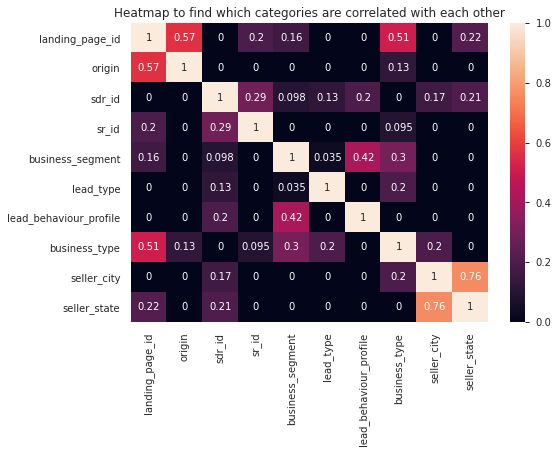

In [134]:
plt.title('Heatmap to find which categories are correlated with each other')

sns.heatmap(correlation_for_categories_cramers,annot=True)


In [135]:
overall_leads_for_prediction.drop(['seller_city'],axis=1,inplace=True)

In [136]:
overall_leads_for_prediction.corrwith(y)

sdr_load    0.559320
sr_load     0.464823
dtype: float64

In [137]:
overall_leads_for_prediction.corr()

,sdr_load,sr_load
sdr_load,1.000000,0.561556
sr_load,0.561556,1.000000


In [138]:
from scipy.stats.contingency import expected_freq

In [139]:
pd.crosstab(overall_leads_for_prediction['landing_page_id'],overall_leads_for_prediction['origin'])

origin,113,direct_traffic,display,email,organic_search,other,paid_search,referral,social,unknown
landing_page_id,,,,,,,,,,
0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0,0,0,0,0,0,1
71,0,0,0,0,0,0,1,0,0,0
72,0,0,0,0,0,0,1,0,0,0


In [140]:
c,p,dof,exp=chi2_contingency(pd.crosstab(overall_leads_for_prediction['landing_page_id'],overall_leads_for_prediction['origin']))

In [141]:
exp #How the expected values are calculated in chi squared expected should be greater than 5, so what test can we do

array([[2.11081794e-02, 1.63588391e-01, 1.05540897e-02, 3.16622691e-02,
        5.91029024e-01, 1.05540897e-02, 5.32981530e-01, 4.74934037e-02,
        1.63588391e-01, 4.27440633e-01],
       [2.11081794e-02, 1.63588391e-01, 1.05540897e-02, 3.16622691e-02,
        5.91029024e-01, 1.05540897e-02, 5.32981530e-01, 4.74934037e-02,
        1.63588391e-01, 4.27440633e-01],
       [2.11081794e-02, 1.63588391e-01, 1.05540897e-02, 3.16622691e-02,
        5.91029024e-01, 1.05540897e-02, 5.32981530e-01, 4.74934037e-02,
        1.63588391e-01, 4.27440633e-01],
       [1.05540897e-02, 8.17941953e-02, 5.27704485e-03, 1.58311346e-02,
        2.95514512e-01, 5.27704485e-03, 2.66490765e-01, 2.37467018e-02,
        8.17941953e-02, 2.13720317e-01],
       [1.05540897e-02, 8.17941953e-02, 5.27704485e-03, 1.58311346e-02,
        2.95514512e-01, 5.27704485e-03, 2.66490765e-01, 2.37467018e-02,
        8.17941953e-02, 2.13720317e-01],
       [1.05540897e-02, 8.17941953e-02, 5.27704485e-03, 1.58311346e-02,
   

In [142]:
c

1736.1884980267705

<b> chi square has an assumption that expected value should be greater than 5, why is that so? and what to do if chi square assumption fails? </b>

<b> Going for Anova </b>

<b> Going to test assumptions for Anova </b>
    <ol>
    <li> Independence, The sample observations must be independent of eachother and groups must be independend of eachother 
    </li> 
    <li>Distributions should be normal within each group
    </li>
    <li>
    groups should have equal variance(Homescedascity)</li></ol>

In [143]:
behavioural_df = pd.concat([overall_leads_for_prediction[['lead_behaviour_profile']],y],axis=1)

Text(0.5, 1.0, 'Box plot to check Variance ')

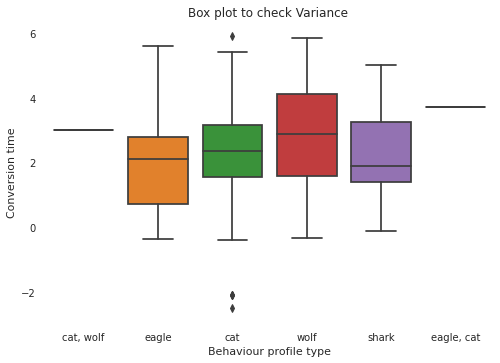

In [144]:
sns.boxplot(x='lead_behaviour_profile',y='conversion_time',data=behavioural_df)
plt.xlabel('Behaviour profile type')
plt.ylabel('Conversion time')
plt.title('Box plot to check Variance ')

In [145]:
import statsmodels.api as sm

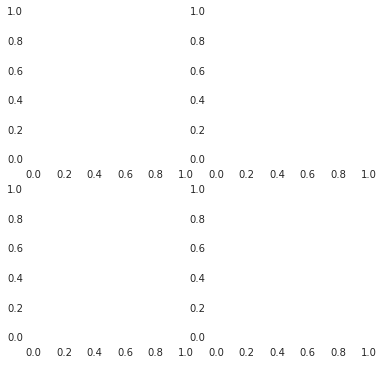

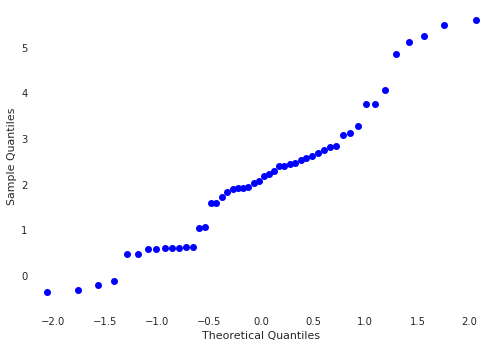

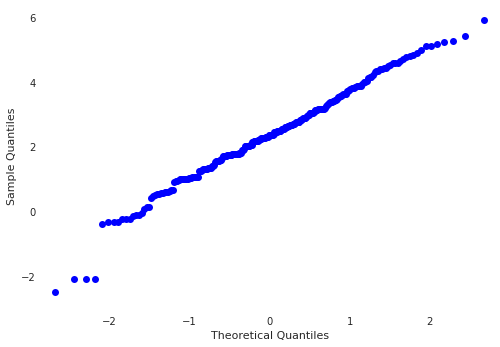

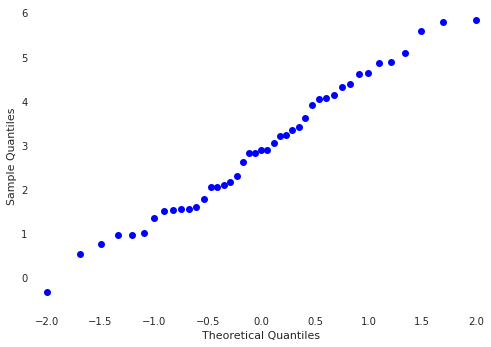

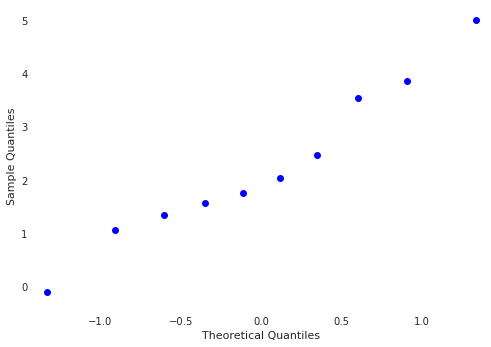

In [146]:
fig,ax = plt.subplots(2,2,figsize=(6,6))
ax[0,0] = sm.qqplot(behavioural_df.loc[behavioural_df['lead_behaviour_profile']=='eagle']['conversion_time'])
ax[0,1] = sm.qqplot(behavioural_df.loc[behavioural_df['lead_behaviour_profile']=='cat']['conversion_time'])
ax[1,0] = sm.qqplot(behavioural_df.loc[behavioural_df['lead_behaviour_profile']=='wolf']['conversion_time'])
ax[1,1] = sm.qqplot(behavioural_df.loc[behavioural_df['lead_behaviour_profile']=='shark']['conversion_time'])

<b> Not normal the values are </b>

In [147]:
overall_leads_for_prediction['origin'].unique().shape

(10,)

In [148]:
from scipy.stats import kstest #two distributions are identical null hypothesis
from scipy.stats import bartlett #checks if different arrays have equal variance

In [149]:
def assumptions_of_anova(df):
    """This function checks for assumptions of anova which are normality for each group and homoscedacity"""
    
    columns= df.select_dtypes(include=['object','category','bool']).columns
    
    for i in columns:
        categories = df[i].unique()
        df_info = pd.DataFrame(np.random.randn(len(categories),1),columns=['Normality'],index=categories)
        for j in categories:
            if(type(j)!=str):
                df_info.loc[df_info.index[j],'Normality'] = 'Not Normal' if kstest(df.loc[df[i]==j]['conversion_time'],'norm')[1] < 0.05 else 'Normal'
            elif(type(j)==str):
                df_info.loc[j,'Normality'] = 'Not Normal' if kstest(df.loc[df[i]==j]['conversion_time'],'norm')[1] < 0.05 else 'Normal'
        print('Homoscedacity for groups within each column equals')
        
        
        print(df_info)
        

In [150]:
overall_leads_for_prediction['origin']=overall_leads_for_prediction['origin'].map({113:'hundred_thirteen'}).fillna(overall_leads_for_prediction['origin'])

In [151]:
overall_leads_for_prediction['lead_type'] =overall_leads_for_prediction['lead_type'].map({172:'one_seven_two'}).fillna(overall_leads_for_prediction['lead_type'])

In [152]:
overall_leads_for_prediction['business_type'] = overall_leads_for_prediction['business_type'].map({287:'two_eight_seven'}).fillna(overall_leads_for_prediction['business_type'])

In [153]:
assumptions_of_anova(pd.concat([overall_leads_for_prediction,y],axis=1))

Homoscedacity for groups within each column equals
     Normality
50  Not Normal
55  Not Normal
46  Not Normal
62  Not Normal
56  Not Normal
..         ...
34  Not Normal
39  Not Normal
47  Not Normal
5   Not Normal
41  Not Normal

[75 rows x 1 columns]
Homoscedacity for groups within each column equals
                   Normality
organic_search    Not Normal
paid_search       Not Normal
social            Not Normal
unknown           Not Normal
display               Normal
direct_traffic    Not Normal
referral          Not Normal
hundred_thirteen  Not Normal
email             Not Normal
other             Not Normal
Homoscedacity for groups within each column equals
     Normality
7   Not Normal
0   Not Normal
12  Not Normal
8   Not Normal
10  Not Normal
11  Not Normal
14  Not Normal
5   Not Normal
1   Not Normal
13  Not Normal
15  Not Normal
17  Not Normal
4   Not Normal
9   Not Normal
2   Not Normal
16  Not Normal
3   Not Normal
6   Not Normal
Homoscedacity for groups within each col

<b> One can see above that the assumptions of Anova are violated,hence using anova to association between categorical independent variable and dependent continuous variable </b>

In [154]:
from scipy.stats import kruskal

In [155]:
def non_parametric_test(df):
    columns= df.select_dtypes(include=['object','category','bool']).columns
    
    
    columns= df.select_dtypes(include=['object','category','bool']).columns
    
    for i in columns:
        categories = df[i].unique()
        df_info = pd.DataFrame(np.random.randn(len(categories),1),columns=['Normality'],index=categories)
        for j in categories:
            if(type(j)!=str):
                df_info.loc[df_info.index[j],'Normality'] = 'Not Normal' if kruskal(df.loc[df[i]==j]['conversion_time'],'norm')[1] < 0.05 else 'Normal'
            elif(type(j)==str):
                df_info.loc[j,'Normality'] = 'Not Normal' if kruskal(df.loc[df[i]==j]['conversion_time'],'norm')[1] < 0.05 else 'Normal'
        print('Homoscedacity for groups within each column equals')
        
        
        print(df_info)
    
    
    

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [157]:
random_forest_df = pd.get_dummies(overall_leads_for_prediction)

In [158]:
x_train,x_test,y_train,y_test = train_test_split(random_forest_df,y,random_state=42)

In [159]:
from sklearn.metrics import mean_squared_error

In [160]:
rfg = RandomForestRegressor()

In [161]:
rfg_model = rfg.fit(x_train,y_train)

In [162]:
rfg_pred = rfg.predict(x_test)

In [163]:
mean_squared_error(y_test,rfg_pred)

0.8305770731772824

In [164]:
for name,important_features in zip(random_forest_df.columns,rfg_model.feature_importances_):
    print(name,important_features)

sdr_load 0.35135661692151143
sr_load 0.20475161376050607
landing_page_id_0 0.00020552248325200452
landing_page_id_1 2.5706090587683717e-05
landing_page_id_2 0.002906336887458891
landing_page_id_3 0.0
landing_page_id_4 0.0
landing_page_id_5 0.0026035217282035844
landing_page_id_6 0.0
landing_page_id_7 0.0008040435451452996
landing_page_id_8 1.637800025360148e-06
landing_page_id_9 1.5553045941409402e-06
landing_page_id_10 0.0
landing_page_id_11 0.011446512561581136
landing_page_id_12 3.4446267168907754e-05
landing_page_id_13 0.005846033031601801
landing_page_id_14 0.0008138869721613935
landing_page_id_15 2.3172462257075467e-05
landing_page_id_16 2.3897845275235113e-05
landing_page_id_17 1.839612725567108e-05
landing_page_id_18 0.0002821974143326429
landing_page_id_19 0.0007195409410731341
landing_page_id_20 4.714750089889948e-05
landing_page_id_21 7.749713742530205e-05
landing_page_id_22 3.5324322506864e-05
landing_page_id_23 0.00023421038697008217
landing_page_id_24 0.0
landing_page_id_

In [165]:
important_features_forest = pd.DataFrame(abs(rfg_model.feature_importances_),random_forest_df.columns,columns = ['Coefficient'])

In [166]:
important_features_forest.sort_values(by='Coefficient',ascending=False)

,Coefficient
sdr_load,0.351357
sr_load,0.204752
landing_page_id_43,0.027898
sdr_id_7,0.022734
sr_id_6,0.015778
...,...
landing_page_id_24,0.000000
landing_page_id_6,0.000000
landing_page_id_70,0.000000
landing_page_id_51,0.000000


In [167]:
from sklearn.metrics import r2_score

In [168]:
r2_score(y_test,rfg_pred)

0.6097961425798053

In [169]:
from joblib import dump,load
dump(rfg_model,'/home/sidharth/Desktop/Capstone_one/models/random_forest_first.joblib')

['/home/sidharth/Desktop/Capstone_one/models/random_forest_first.joblib']

In [170]:
important_features_forest.to_csv('/home/sidharth/Desktop/Capstone_one/data/random_forest_initial_features.csv')

In [171]:
import xgboost as xgb

In [172]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load
0,50,organic_search,7,6,computers,online_medium,"cat, wolf",reseller,MG,6.0,5.0
1,55,paid_search,7,6,bags_backpacks,online_small,eagle,manufacturer,SP,20.0,14.0
2,46,social,7,6,household_utilities,online_medium,cat,manufacturer,PR,69.0,74.0
3,62,organic_search,7,6,toys,online_medium,cat,reseller,SP,18.0,17.0
4,56,unknown,7,6,construction_tools_house_garden,online_big,cat,reseller,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
375,5,unknown,4,1,health_beauty,offline,eagle,reseller,RS,8.0,3.0
376,41,social,5,3,home_decor,online_big,cat,reseller,SP,20.0,1.0
377,27,paid_search,2,3,computers,online_medium,eagle,reseller,RJ,8.0,1.0
378,67,paid_search,6,11,home_decor,online_medium,wolf,manufacturer,RJ,0.0,0.0


In [173]:
xgboost_data = pd.get_dummies(overall_leads_for_prediction)

In [174]:
x_train, x_test, y_train, y_test = train_test_split(xgboost_data, y,random_state=42)

In [175]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [176]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load
0,50,organic_search,7,6,computers,online_medium,"cat, wolf",reseller,MG,6.0,5.0
1,55,paid_search,7,6,bags_backpacks,online_small,eagle,manufacturer,SP,20.0,14.0
2,46,social,7,6,household_utilities,online_medium,cat,manufacturer,PR,69.0,74.0
3,62,organic_search,7,6,toys,online_medium,cat,reseller,SP,18.0,17.0
4,56,unknown,7,6,construction_tools_house_garden,online_big,cat,reseller,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
375,5,unknown,4,1,health_beauty,offline,eagle,reseller,RS,8.0,3.0
376,41,social,5,3,home_decor,online_big,cat,reseller,SP,20.0,1.0
377,27,paid_search,2,3,computers,online_medium,eagle,reseller,RJ,8.0,1.0
378,67,paid_search,6,11,home_decor,online_medium,wolf,manufacturer,RJ,0.0,0.0


In [177]:
xgb_model.fit(x_train,y_train)

xg_preds = xgb_model.predict(x_test)

In [178]:
mean_squared_error(y_test,xg_preds)

0.9040944200514123

In [179]:
r2_score(y_test,xg_preds)

0.5752578037982569

In [180]:
important_features_xgb = pd.DataFrame(abs(xgb_model.feature_importances_),xgboost_data.columns,columns = ['Coefficient'])

In [181]:
important_features_xgb.sort_values(by='Coefficient',ascending=False)

,Coefficient
sdr_id_9,0.156046
seller_state_GO,0.094526
landing_page_id_2,0.067288
sr_id_7,0.037788
sdr_id_2,0.035685
...,...
landing_page_id_39,0.000000
sdr_id_6,0.000000
sdr_id_3,0.000000
landing_page_id_8,0.000000


In [182]:
x_train

,sdr_load,sr_load,landing_page_id_0,landing_page_id_1,landing_page_id_2,landing_page_id_3,landing_page_id_4,landing_page_id_5,landing_page_id_6,landing_page_id_7,...,seller_state_ES,seller_state_GO,seller_state_MG,seller_state_PB,seller_state_PE,seller_state_PR,seller_state_RJ,seller_state_RS,seller_state_SC,seller_state_SP
168,8.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
308,16.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
282,14.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60,6.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
366,5.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106,12.0,17.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271,11.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
349,20.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [183]:
overall_leads_for_prediction[['lead_type','landing_page_id','origin']]

,lead_type,landing_page_id,origin
0,online_medium,50,organic_search
1,online_small,55,paid_search
2,online_medium,46,social
3,online_medium,62,organic_search
4,online_big,56,unknown
...,...,...,...
375,offline,5,unknown
376,online_big,41,social
377,online_medium,27,paid_search
378,online_medium,67,paid_search


In [184]:
(pd.crosstab(overall_leads_for_prediction['lead_type'],overall_leads_for_prediction['origin'],margins=True))

origin,direct_traffic,display,email,hundred_thirteen,organic_search,other,paid_search,referral,social,unknown,All
lead_type,,,,,,,,,,,
industry,2,0,0,0,14,0,14,0,2,9,41
offline,5,0,0,1,3,0,10,3,1,7,30
one_seven_two,1,0,0,0,2,0,0,0,0,0,3
online_beginner,2,0,0,0,6,0,6,0,3,4,21
online_big,5,1,0,2,24,1,19,4,6,16,78
online_medium,12,1,6,1,55,1,43,1,14,38,172
online_small,4,0,0,0,6,0,8,1,5,4,28
online_top,0,0,0,0,2,0,1,0,0,3,6
All,31,2,6,4,112,2,101,9,31,81,379


In [185]:
pd.crosstab(overall_leads_for_prediction['landing_page_id'],overall_leads_for_prediction['lead_type'],margins=True)

lead_type,industry,offline,one_seven_two,online_beginner,online_big,online_medium,online_small,online_top,All
landing_page_id,,,,,,,,,
0,0,0,0,0,1,1,0,0,2
1,1,0,0,1,0,0,0,0,2
2,1,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,1,0,0,1
72,0,1,0,0,0,0,0,0,1
73,2,0,0,0,0,0,1,0,3


In [186]:
pd.crosstab(overall_leads_for_prediction['landing_page_id'],overall_leads_for_prediction['origin'],margins=True)

origin,direct_traffic,display,email,hundred_thirteen,organic_search,other,paid_search,referral,social,unknown,All
landing_page_id,,,,,,,,,,,
0,0,0,0,0,0,0,2,0,0,0,2
1,0,0,0,0,0,0,2,0,0,0,2
2,0,0,0,0,1,0,0,0,0,1,2
3,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,1,0,0,0,1
72,0,0,0,0,0,0,1,0,0,0,1
73,0,0,0,0,0,0,3,0,0,0,3


<b> One can see that <i>origin</i> has 4 main categories in when we create a cross tab with landing page id, which are organic search,paid search,unknown,direct traffic. Rest of the categories can be clubbed together to make one.</b>

<b> So new origin categories are 
    <ol><li>organic search</li>
        <li>paid search </li>
        <li>Unknown </li>
        <li>direct traffic </li>
        <li>Rest</li>
        <li>Social</li>
    </ol>
    </b>

In [187]:
overall_leads_for_prediction['origin']=overall_leads_for_prediction['origin'].replace(['display','email','hundred_thirteen','other','referral'],['rest','rest','rest','rest','rest'])

In [188]:
overall_leads_for_prediction['landing_page_id'].value_counts()[:10]

13    82
56    81
26    37
62    29
46    14
31    11
69     9
18     5
43     5
50     5
Name: landing_page_id, dtype: int64

<b> It looks like certain landing page id's contribute a lot to the leads while some others are comparatively very less. Hence we are going to club categories which have contributed to less than 10 leads as the data was collected over a year and less than 10 over a year amounts to 2%</b>

In [189]:
other_landing_page_id=overall_leads_for_prediction.loc[((overall_leads_for_prediction['landing_page_id']!=13)&(overall_leads_for_prediction['landing_page_id']!=56)&(overall_leads_for_prediction['landing_page_id']!=26)&(overall_leads_for_prediction['landing_page_id']!=62)&(overall_leads_for_prediction['landing_page_id']!=46)&(overall_leads_for_prediction['landing_page_id']!=31))]['landing_page_id'].values

In [190]:
overall_leads_for_prediction['landing_page_id']=overall_leads_for_prediction['landing_page_id'].replace(other_landing_page_id,100)

In [191]:
overall_leads_for_prediction['landing_page_id'] = overall_leads_for_prediction.astype('category')

In [192]:
overall_leads_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 379
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   landing_page_id         379 non-null    object  
 1   origin                  379 non-null    object  
 2   sdr_id                  379 non-null    category
 3   sr_id                   379 non-null    category
 4   business_segment        379 non-null    object  
 5   lead_type               379 non-null    object  
 6   lead_behaviour_profile  379 non-null    object  
 7   business_type           379 non-null    object  
 8   seller_state            379 non-null    object  
 9   sdr_load                379 non-null    float64 
 10  sr_load                 379 non-null    float64 
dtypes: category(2), float64(2), object(7)
memory usage: 41.9+ KB


In [193]:
overall_leads_for_prediction['business_segment'].value_counts()

health_beauty                      44
household_utilities                44
home_decor                         44
construction_tools_house_garden    32
audio_video_electronics            31
car_accessories                    30
pet                                17
bags_backpacks                     14
sports_leisure                     14
computers                          12
bed_bath_table                     10
toys                               10
food_drink                          9
food_supplement                     8
stationery                          7
small_appliances                    7
baby                                6
fashion_accessories                 6
home_appliances                     5
phone_mobile                        5
books                               4
music_instruments                   4
watches                             3
handcrafted                         3
gifts                               3
home_office_furniture               3
air_conditio

In [194]:
chi2_contingency(pd.crosstab(overall_leads_for_prediction['landing_page_id'],overall_leads_for_prediction['origin']))

(531.5145678100943,
 4.063218732511414e-93,
 30,
 array([[ 6.70712401, 24.23218997, 21.85224274,  4.9762533 ,  6.70712401,
         17.52506596],
        [ 3.02638522, 10.93403694,  9.86015831,  2.24538259,  3.02638522,
          7.90765172],
        [ 0.89973615,  3.25065963,  2.93139842,  0.66754617,  0.89973615,
          2.35092348],
        [ 1.14511873,  4.13720317,  3.73087071,  0.84960422,  1.14511873,
          2.99208443],
        [ 6.62532982, 23.93667546, 21.58575198,  4.91556728,  6.62532982,
         17.31134565],
        [ 2.37203166,  8.56992084,  7.72823219,  1.75989446,  2.37203166,
          6.19788918],
        [10.22427441, 36.93931398, 33.31134565,  7.58575198, 10.22427441,
         26.71503958]]))

In [195]:
rfg_data_converted=pd.get_dummies(overall_leads_for_prediction)

In [196]:
x_train,x_test,y_train,y_test = train_test_split(rfg_data_converted,y,random_state=42)

In [197]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [198]:
mean_squared_error(y_test,y_pred)

2.5843291709134512e+19

In [199]:
y_pred = rfg.predict(x_test)

In [200]:
r2_score(y_test,y_pred)

0.5961503675678359

In [201]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [202]:
y_pred = xgb_model.predict(x_test)

In [203]:
r2_score(y_test,y_pred)

0.603209851861116

In [204]:
xgb_params = {'colsample_bytree':[0.3,0.4,0.5],
             'learning_rate':[0.1,0.05,0.01],
             'n_estimators':np.arange(10,1000,10),
             'max_depth':[3,5,7]}

In [205]:
rfg_params = {
             'n_estimators':np.arange(10,300,10),
             'criterion':['mse']
             }

In [206]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [207]:
rf_reg_grid = GridSearchCV(rfg,param_grid=rfg_params,cv=5)

In [208]:
rf_reg_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])})

In [209]:
rf_reg_grid.best_score_

0.4315024411762097

In [210]:
rf_reg_grid

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])})

In [211]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load
0,100,organic_search,7,6,computers,online_medium,"cat, wolf",reseller,MG,6.0,5.0
1,100,paid_search,7,6,bags_backpacks,online_small,eagle,manufacturer,SP,20.0,14.0
2,46,social,7,6,household_utilities,online_medium,cat,manufacturer,PR,69.0,74.0
3,62,organic_search,7,6,toys,online_medium,cat,reseller,SP,18.0,17.0
4,56,unknown,7,6,construction_tools_house_garden,online_big,cat,reseller,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
375,100,unknown,4,1,health_beauty,offline,eagle,reseller,RS,8.0,3.0
376,100,social,5,3,home_decor,online_big,cat,reseller,SP,20.0,1.0
377,100,paid_search,2,3,computers,online_medium,eagle,reseller,RJ,8.0,1.0
378,100,paid_search,6,11,home_decor,online_medium,wolf,manufacturer,RJ,0.0,0.0


In [212]:

map_business_segment = {'health_beauty':'health',
                        'household_utilities':'home',
                        'home_decor':'home',
                        'construction_tools_house_garden':'miscellaneous',
                       'audio_video_electronics':'electronics',
                       'car_accessories':'automobiles',
                       'pet':'pet',
                       'bags_backpacks':'home',
                       'sports_leisure':'hobby',
                       'computers':'electronics',
                       'toys':'kids',
                       'bed_bath_table':'home',
                       'food_drink':'food',
                       'food_supplement':'food',
                       'small_appliances':'electronics',
                       'stationery':'kids',
                       'fashion_accessories':'miscellaneous',
                       'baby':'kids',
                       'phone_mobile':'electronics',
                       'home_appliances':'home',
                       'music_instruments':'miscellaneous',
                       'books':'miscellaneous',
                       'gifts':'miscellaneous',
                       'home_office_furniture':'furniture',
                       'watches':'utility',
                       'handcrafted':'hobby',
                       'air_conditioning':'electronics',
                       'party':'hobby',
                       'games_consoles':'hobby'}

In [213]:
overall_leads_for_prediction['business_segment']=overall_leads_for_prediction['business_segment'].map(map_business_segment)

In [214]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load
0,100,organic_search,7,6,electronics,online_medium,"cat, wolf",reseller,MG,6.0,5.0
1,100,paid_search,7,6,home,online_small,eagle,manufacturer,SP,20.0,14.0
2,46,social,7,6,home,online_medium,cat,manufacturer,PR,69.0,74.0
3,62,organic_search,7,6,kids,online_medium,cat,reseller,SP,18.0,17.0
4,56,unknown,7,6,miscellaneous,online_big,cat,reseller,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
375,100,unknown,4,1,health,offline,eagle,reseller,RS,8.0,3.0
376,100,social,5,3,home,online_big,cat,reseller,SP,20.0,1.0
377,100,paid_search,2,3,electronics,online_medium,eagle,reseller,RJ,8.0,1.0
378,100,paid_search,6,11,home,online_medium,wolf,manufacturer,RJ,0.0,0.0


In [215]:
new_dataset = pd.get_dummies(overall_leads_for_prediction,drop_first=True)

In [216]:
new_dataset

,sdr_load,sr_load,landing_page_id_26,landing_page_id_31,landing_page_id_46,landing_page_id_56,landing_page_id_62,landing_page_id_100,origin_organic_search,origin_paid_search,...,seller_state_ES,seller_state_GO,seller_state_MG,seller_state_PB,seller_state_PE,seller_state_PR,seller_state_RJ,seller_state_RS,seller_state_SC,seller_state_SP
0,6.0,5.0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,20.0,14.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,69.0,74.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,18.0,17.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,29.0,26.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8.0,3.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
376,20.0,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
377,8.0,1.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
378,0.0,0.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [217]:
x_train,x_test,y_train,y_test = train_test_split(new_dataset,y,test_size=0.30)

In [218]:
rfg_model.fit(x_train,y_train)

RandomForestRegressor()

In [219]:
check_pred = rfg_model.predict(x_test)

In [220]:
np.sqrt(mean_squared_error(y_test,check_pred))

1.0537319346673346

In [221]:
r2_score(y_test,check_pred)

0.35080043963939833

In [222]:
x_test

,sdr_load,sr_load,landing_page_id_26,landing_page_id_31,landing_page_id_46,landing_page_id_56,landing_page_id_62,landing_page_id_100,origin_organic_search,origin_paid_search,...,seller_state_ES,seller_state_GO,seller_state_MG,seller_state_PB,seller_state_PE,seller_state_PR,seller_state_RJ,seller_state_RS,seller_state_SC,seller_state_SP
210,10.0,5.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,11.0,14.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
14,7.0,14.0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
108,6.0,8.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
221,11.0,7.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,11.0,7.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
149,12.0,8.0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
343,11.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
286,4.0,4.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


<b> Is my model good even if I have low r2 score but low rmse </b>

In [223]:
from sklearn.decomposition import PCA

In [224]:
pca = PCA(n_components=10)

In [225]:
pca.fit(x_train)

PCA(n_components=10)

In [226]:
pca.explained_variance_ratio_

array([0.80053983, 0.17591846, 0.0018844 , 0.00147313, 0.00140093,
       0.0013004 , 0.00110505, 0.00093494, 0.00084682, 0.00080225])

In [227]:
pca.singular_values_

array([218.41812346, 102.38890605,  10.59702455,   9.36953672,
         9.13705222,   8.80311697,   8.11500781,   7.46429715,
         7.10384713,   6.91435108])

In [228]:
pca.n_features_

83

In [229]:
pca.explained_variance_

array([180.70635097,  39.71018213,   0.42536716,   0.33253113,
         0.3162338 ,   0.29354117,   0.24944451,   0.21104444,
         0.19115395,   0.18109186])

In [230]:
pca_2 = PCA(n_components=2)

In [231]:
x_train.shape
x_test.shape

(114, 83)

In [232]:
transformed_train = pca_2.fit_transform(x_train)
transformed_test = pca_2.transform(x_test)

In [233]:
rfg_model.fit(transformed_train,y_train)
y_pred = rfg.predict(transformed_test)

In [234]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))


1.1243543321983704
0.2608640464190467


In [235]:
rfg_model.score(transformed_train,y_train)

0.9141488823618447

In [236]:
xgb_model.fit(transformed_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [237]:
y_pred = xgb_model.predict(transformed_test)

In [238]:
xgb_model.score(transformed_train,y_train)

0.9933181764900065

In [239]:
mean_squared_error(y_test,y_pred)

1.7990262654350215

In [240]:
r2_score(y_test,y_pred)

-0.05185393715250619

In [241]:
linear_reg = LinearRegression()

In [242]:
linear_reg.fit(transformed_train,y_train)

LinearRegression()

In [243]:
y_pred = linear_reg.predict(transformed_test)

In [244]:
linear_reg.score(transformed_train,y_train)

0.35152265732841326

In [245]:
mean_squared_error(y_test,y_pred)

1.169143846593446

In [246]:
r2_score(y_test,y_pred)

0.3164254565012855

<b> Feature Engineering sdr id to reduce number of levels within the category. Creating masks and changing values. </b>

<b> <i>sdr_id</i> is split into 3 levels. 
    <ol> <li> 
        High for every sdr who has greater than 10% of entire leads </li>
        <li> Mid for values greate than 5% and less than 10% </li>
        <li>low otherwise. </li>
    </ol>
</b>

In [247]:
overall_leads_for_prediction['sdr_id'].value_counts()

7     70
0     44
12    33
8     32
10    31
11    30
14    24
5     21
1     20
13    15
15    15
17    15
4     14
2      9
9      2
16     2
6      1
3      1
Name: sdr_id, dtype: int64

In [248]:
count_per_sdr = overall_leads_for_prediction['sdr_id'].value_counts(normalize=True)

In [249]:
count_per_sdr

7     0.184697
0     0.116095
12    0.087071
8     0.084433
10    0.081794
11    0.079156
14    0.063325
5     0.055409
1     0.052770
13    0.039578
15    0.039578
17    0.039578
4     0.036939
2     0.023747
9     0.005277
16    0.005277
6     0.002639
3     0.002639
Name: sdr_id, dtype: float64

In [250]:
mid_level_mask = overall_leads_for_prediction['sdr_id'].isin(count_per_sdr[(count_per_sdr < 0.10) & (count_per_sdr>0.05)].index)

In [251]:
low_level_mask = overall_leads_for_prediction['sdr_id'].isin(count_per_sdr[(count_per_sdr < 0.05)].index)

In [252]:
overall_leads_for_prediction['sdr_id']=overall_leads_for_prediction['sdr_id'].astype('object')

In [253]:
overall_leads_for_prediction['sdr_id'][mid_level_mask] = 'mid'

<ipython-input-253-75403e9e8b8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['sdr_id'][mid_level_mask] = 'mid'


In [254]:
overall_leads_for_prediction['sdr_id'][low_level_mask] = 'low'

<ipython-input-254-9e4983dde50c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['sdr_id'][low_level_mask] = 'low'


In [255]:
high_level_mask = overall_leads_for_prediction['sdr_id'].isin(count_per_sdr[(count_per_sdr > 0.10)].index)

In [256]:
overall_leads_for_prediction['sdr_id'][high_level_mask] = 'high'

<ipython-input-256-4eac75bfe36d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['sdr_id'][high_level_mask] = 'high'


In [257]:
overall_leads_for_prediction['sdr_id']=overall_leads_for_prediction['sdr_id'].astype('category')

<b> <i>sr_id</i> is split into 3 levels. 
    <ol> <li> 
        High for every sdr who has greater than 10% of entire leads </li>
        <li> Mid for values greate than 5% and less than 10% </li>
        <li>low otherwise. </li>
    </ol>
</b>

In [258]:
count_per_sr = overall_leads_for_prediction['sr_id'].value_counts(normalize=True)

In [259]:
mid_level_mask = overall_leads_for_prediction['sr_id'].isin(count_per_sr[(count_per_sdr < 0.10) & (count_per_sr>0.05)].index)

In [260]:
low_level_mask = overall_leads_for_prediction['sr_id'].isin(count_per_sr[(count_per_sr < 0.05)].index)

In [261]:
high_level_mask = overall_leads_for_prediction['sr_id'].isin(count_per_sdr[(count_per_sr > 0.10)].index)

In [262]:
overall_leads_for_prediction['sr_id']=overall_leads_for_prediction['sr_id'].astype('object')

In [263]:
overall_leads_for_prediction['sr_id'][mid_level_mask] = 'mid'

<ipython-input-263-8e2baa8556f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['sr_id'][mid_level_mask] = 'mid'


In [264]:
overall_leads_for_prediction['sr_id'][high_level_mask] = 'high'

<ipython-input-264-dffac036c4ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['sr_id'][high_level_mask] = 'high'


In [265]:
overall_leads_for_prediction['sr_id'][low_level_mask] = 'low'

<ipython-input-265-50c9da516f09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['sr_id'][low_level_mask] = 'low'


In [266]:
overall_leads_for_prediction['sr_id'] = overall_leads_for_prediction['sr_id'].astype('category')

In [267]:
pd.get_dummies(overall_leads_for_prediction)

,sdr_load,sr_load,landing_page_id_13,landing_page_id_26,landing_page_id_31,landing_page_id_46,landing_page_id_56,landing_page_id_62,landing_page_id_100,origin_direct_traffic,...,seller_state_ES,seller_state_GO,seller_state_MG,seller_state_PB,seller_state_PE,seller_state_PR,seller_state_RJ,seller_state_RS,seller_state_SC,seller_state_SP
0,6.0,5.0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,20.0,14.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,69.0,74.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,18.0,17.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29.0,26.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8.0,3.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
376,20.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
377,8.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
378,0.0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [268]:
overall_leads_for_prediction.to_csv('/home/sidharth/Desktop/Capstone_one/data/all_feature_engineering.csv')

In [269]:
seller_state_counts=overall_leads_for_prediction['seller_state'].value_counts(normalize=True)

In [270]:
seller_state_counts

SP    0.609499
PR    0.084433
MG    0.068602
RJ    0.068602
SC    0.060686
RS    0.050132
GO    0.018470
ES    0.010554
DF    0.010554
BA    0.007916
CE    0.005277
PE    0.002639
PB    0.002639
Name: seller_state, dtype: float64

<b> Looks like SP alone has close to 60% of clients while the rest have less than 10% 
Let's downsize the state levels within column.
<ol>
    <li>Sp will remain as it is.</li>
    <li>Values greater than 5% and less than 10% will be clubbed together as medium</li>
    <li> Values less than that will be clubbed as low<li></ol></b>

In [271]:
mid_level_mask = overall_leads_for_prediction['seller_state'].isin(seller_state_counts[(seller_state_counts < 0.10) & (seller_state_counts>0.05)].index)

In [272]:
low_mask = overall_leads_for_prediction['seller_state'].isin(seller_state_counts[(seller_state_counts<0.05)].index)

In [273]:
overall_leads_for_prediction['seller_state'][mid_level_mask] = 'medium'

<ipython-input-273-2ab8659c257c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['seller_state'][mid_level_mask] = 'medium'


In [274]:
overall_leads_for_prediction['seller_state'][low_mask] = 'low'

<ipython-input-274-effeaa022846>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_leads_for_prediction['seller_state'][low_mask] = 'low'


In [275]:
overall_leads_for_prediction['seller_state'] = overall_leads_for_prediction['seller_state'].astype('category')

In [276]:
final_dummies = pd.get_dummies(overall_leads_for_prediction)

In [277]:
x_train,x_test,y_train,y_test = train_test_split(final_dummies,y,random_state=42)

In [278]:
def regression_models():
    model_comparison = pd.DataFrame(np.zeros((2,4)),columns=['Model_Name','train_r2_score','test_rmse','r2_score'])
    
    rfg_model = RandomForestRegressor()
    xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
    
    rfg_model.fit(x_train,y_train)
    xgb_model.fit(x_train,y_train)
    
    rfg_pred = rfg_model.predict(x_test)
    xgb_pred = xgb_model.predict(x_test)
    
    
    model_comparison.loc[1:'Model_Name'] = 'Random Forest'
    model_comparison.loc[1:'train_r2_score'] = rfg_model.score
    model_comparison.loc[1:'test_rmse']  =  np.sqrt(mean_squared_error(y_test,rfg_pred))
    model_comparison.loc[1:'r2_score']   = r2_score(y_test,rfg_pred)
    
    '''
    model_comparison.loc[0:'Model_Name'] = 'XGB'
    model_comparison.loc[0:'train_r2_score'] = xgb_model.score
    model_comparison.loc[0:'test_rmse']  =  np.sqrt(mean_squared_error(y_test,xgb_pred))
    model_comparison.loc[0:'r2_score']   = r2_score(y_test,xgb_pred)
    '''
    
    print(model_comparison)
    
    model_comparison=model_comparison.T
    model_comparison.columns = ['XGB','Randomforest']
    
    return(model_comparison)
    

In [279]:
regression_models()

  Model_Name train_r2_score test_rmse  r2_score
0          0              0         0         0
1   0.592838       0.592838  0.592838  0.592838


,XGB,Randomforest
Model_Name,0,0.592838
train_r2_score,0,0.592838
test_rmse,0,0.592838
r2_score,0,0.592838


In [280]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [281]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [282]:
xgb_pred = xgb_model.predict(x_test)

In [283]:
r2_score(y_test,xgb_pred)

0.5296263438345665

In [284]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load
0,100,organic_search,high,high,electronics,online_medium,"cat, wolf",reseller,medium,6.0,5.0
1,100,paid_search,high,high,home,online_small,eagle,manufacturer,SP,20.0,14.0
2,46,social,high,high,home,online_medium,cat,manufacturer,medium,69.0,74.0
3,62,organic_search,high,high,kids,online_medium,cat,reseller,SP,18.0,17.0
4,56,unknown,high,high,miscellaneous,online_big,cat,reseller,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
375,100,unknown,low,low,health,offline,eagle,reseller,medium,8.0,3.0
376,100,social,mid,low,home,online_big,cat,reseller,SP,20.0,1.0
377,100,paid_search,low,low,electronics,online_medium,eagle,reseller,medium,8.0,1.0
378,100,paid_search,low,low,home,online_medium,wolf,manufacturer,medium,0.0,0.0


In [285]:
load_data = overall_leads_for_prediction[['sdr_load','sr_load']]

In [286]:
x_train,x_test,y_train,y_test = train_test_split(load_data,y)

In [287]:
rfg_model.fit(x_train,y_train)

RandomForestRegressor()

In [288]:
y_pred = rfg_model.predict(x_test)

In [289]:
r2_score(y_test,y_pred)

0.27173686340051995

In [290]:
for i in overall_leads_for_prediction.select_dtypes(include=['object']).columns:
    overall_leads_for_prediction[i] = overall_leads_for_prediction[i].astype('category')

In [291]:
correlation_for_categories_cramers = categorical_correlation(overall_leads_for_prediction,test_type='cramer')

<AxesSubplot:title={'center':'Heatmap to find which categories are correlated with each other'}>

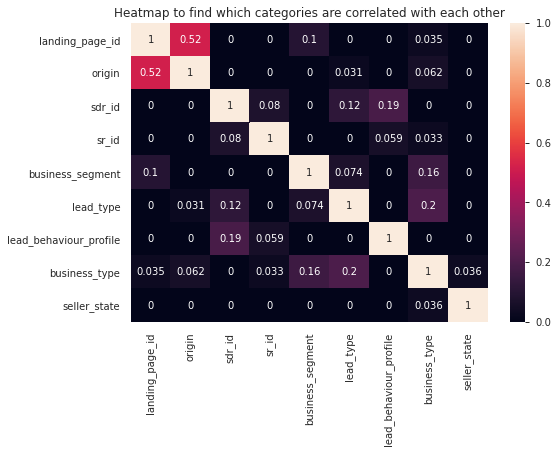

In [292]:
plt.title('Heatmap to find which categories are correlated with each other')

sns.heatmap(correlation_for_categories_cramers,annot=True)


In [293]:
revised_overall = overall_leads_for_prediction[['sdr_id','sr_id','origin','sr_load','sdr_load']]

In [294]:
x_train,x_test,y_train,y_test = train_test_split(pd.get_dummies(revised_overall),y,random_state=42)

In [295]:
rfg_model.fit(x_train,y_train)

RandomForestRegressor()

In [296]:
y_pred = rfg_model.predict(x_test)

In [297]:
r2_score(y_test,y_pred)

0.5127258229910949

In [298]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [299]:
y_pred = xgb_model.predict(x_test)

In [300]:
r2_score(y_test,y_pred)

0.30266272769915814

In [301]:
from sklearn.tree import DecisionTreeRegressor

In [302]:
dtr = DecisionTreeRegressor()

In [303]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [304]:
y_pred = dtr.predict(x_test)

In [305]:
r2_score(y_test,y_pred)

0.15843896478584285

In [306]:
dtr.score(x_train,y_train)

0.9897041330627583

In [307]:
y_orig = np.exp(y)

<b> From box plor below, looks like the distribution has considerable number of outliers. We are going to set any value greater than 95th percentile to be equal to the 95th percentile. </b>

Text(0.5, 0, 'Conversion Days')

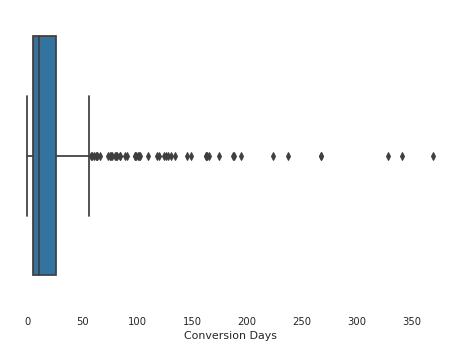

In [308]:
sns.boxplot(y_orig)
plt.xlabel('Conversion Days')

In [309]:
def perform_outlier_analysis(series):
    t5 = np.percentile(series,25)
    s5 = np.percentile(series,75)
    
    iqr = s5 - t5
    
    print(series[series>(1.5*iqr)])
    

In [310]:
perform_outlier_analysis(y_orig)

2      163.829456
7      162.671829
12      84.716181
13      98.878252
19      54.589016
          ...    
375     42.553611
376    117.830637
377    267.762662
378    341.514653
379    369.850324
Name: conversion_time, Length: 82, dtype: float64


In [311]:
mask=y_orig > np.percentile(y_orig,95)

In [312]:
y_orig[mask] = np.percentile(y_orig,95)

In [313]:
y_log = np.log(y_orig)

In [314]:
dummy_data=pd.get_dummies(overall_leads_for_prediction)

In [315]:
x_train,x_test,y_train,y_test = train_test_split(dummy_data,y_log)

In [316]:
rfg_model.fit(x_train,y_train)

RandomForestRegressor()

In [317]:
rfg_model.score(x_train,y_train)

0.9279688370887623

In [318]:
y_pred = rfg_model.predict(x_test)

In [319]:
r2_score(y_test,y_pred)

0.46248453674378875

In [320]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [321]:
y_pred = xgb_model.predict(x_test)

In [322]:
r2_score(y_test,y_pred)

0.4978731550203698

In [323]:
overall_leads_for_prediction

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load
0,100,organic_search,high,high,electronics,online_medium,"cat, wolf",reseller,medium,6.0,5.0
1,100,paid_search,high,high,home,online_small,eagle,manufacturer,SP,20.0,14.0
2,46,social,high,high,home,online_medium,cat,manufacturer,medium,69.0,74.0
3,62,organic_search,high,high,kids,online_medium,cat,reseller,SP,18.0,17.0
4,56,unknown,high,high,miscellaneous,online_big,cat,reseller,SP,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
375,100,unknown,low,low,health,offline,eagle,reseller,medium,8.0,3.0
376,100,social,mid,low,home,online_big,cat,reseller,SP,20.0,1.0
377,100,paid_search,low,low,electronics,online_medium,eagle,reseller,medium,8.0,1.0
378,100,paid_search,low,low,home,online_medium,wolf,manufacturer,medium,0.0,0.0


In [324]:
overall_leads_for_prediction['business_segment'].value_counts()

home             117
electronics       57
miscellaneous     49
health            44
automobiles       30
kids              23
hobby             19
pet               17
food              17
utility            3
furniture          3
Name: business_segment, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'automobiles'),
  Text(1, 0, 'electronics'),
  Text(2, 0, 'food'),
  Text(3, 0, 'furniture'),
  Text(4, 0, 'health'),
  Text(5, 0, 'hobby'),
  Text(6, 0, 'home'),
  Text(7, 0, 'kids'),
  Text(8, 0, 'miscellaneous'),
  Text(9, 0, 'pet'),
  Text(10, 0, 'utility')])

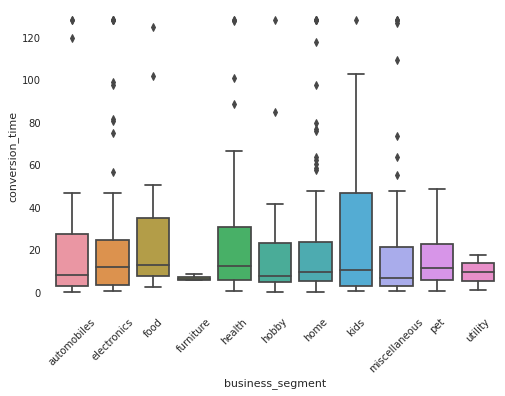

In [325]:
sns.boxplot(overall_leads_for_prediction['business_segment'],y_orig)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'industry'),
  Text(1, 0, 'offline'),
  Text(2, 0, 'one_seven_two'),
  Text(3, 0, 'online_beginner'),
  Text(4, 0, 'online_big'),
  Text(5, 0, 'online_medium'),
  Text(6, 0, 'online_small'),
  Text(7, 0, 'online_top')])

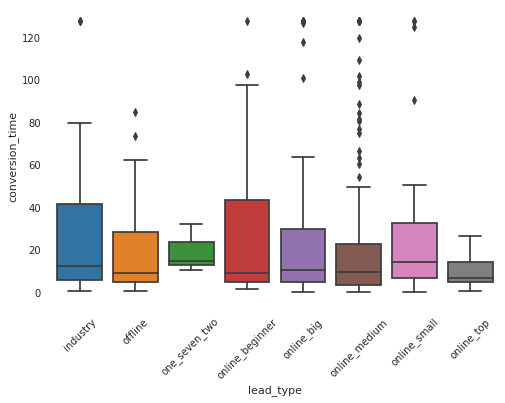

In [326]:
sns.boxplot(overall_leads_for_prediction['lead_type'],y_orig)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'cat'),
  Text(1, 0, 'cat, wolf'),
  Text(2, 0, 'eagle'),
  Text(3, 0, 'eagle, cat'),
  Text(4, 0, 'shark'),
  Text(5, 0, 'wolf')])

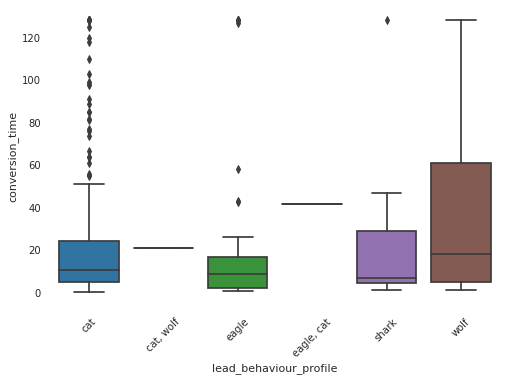

In [327]:
sns.boxplot(overall_leads_for_prediction['lead_behaviour_profile'],y_orig)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'manufacturer'),
  Text(1, 0, 'reseller'),
  Text(2, 0, 'two_eight_seven')])

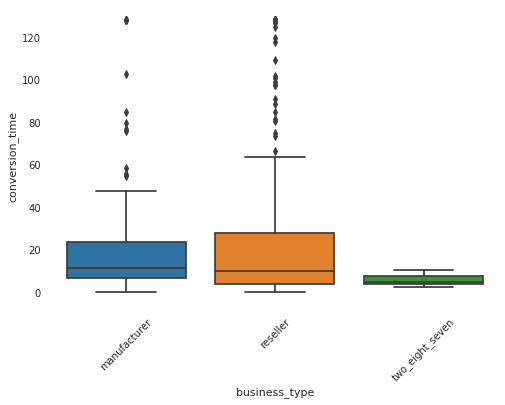

In [328]:
sns.boxplot(overall_leads_for_prediction['business_type'],y_orig)
plt.xticks(rotation=45)

In [329]:
ind=overall_leads_for_prediction[overall_leads_for_prediction['business_type']=='two_eight_seven'].index

In [330]:
overall_leads_for_prediction.loc[ind,'business_type'] = 'manufacturer'

In [331]:
overall_leads_for_prediction=pd.concat([overall_leads_for_prediction,y_orig],axis=1)

In [332]:
manufacturer=overall_leads_for_prediction[overall_leads_for_prediction['business_type']=='manufacturer']

In [333]:
manufacturer

,landing_page_id,origin,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,business_type,seller_state,sdr_load,sr_load,conversion_time
1,100,paid_search,high,high,home,online_small,eagle,manufacturer,SP,20.0,14.0,10.839190
2,46,social,high,high,home,online_medium,cat,manufacturer,medium,69.0,74.0,128.038675
5,100,rest,high,high,automobiles,online_big,wolf,manufacturer,medium,17.0,12.0,7.752708
6,13,organic_search,high,high,home,online_medium,wolf,manufacturer,SP,16.0,9.0,2.614132
8,13,direct_traffic,high,high,miscellaneous,online_big,cat,manufacturer,SP,15.0,9.0,11.679769
...,...,...,...,...,...,...,...,...,...,...,...,...
360,100,paid_search,high,low,kids,online_beginner,cat,manufacturer,medium,53.0,10.0,102.731019
366,13,organic_search,mid,low,miscellaneous,industry,cat,manufacturer,medium,5.0,9.0,47.721308
370,56,unknown,mid,low,food,online_medium,cat,manufacturer,SP,9.0,5.0,12.754549
378,100,paid_search,low,low,home,online_medium,wolf,manufacturer,medium,0.0,0.0,128.038675


In [334]:
reseller = overall_leads_for_prediction[overall_leads_for_prediction['business_type']=='reseller']

In [335]:
reseller_dummies=pd.get_dummies(reseller.drop(['business_type','conversion_time'],axis=1))

In [336]:
manufacturer_dummies = pd.get_dummies(manufacturer.drop(['business_type','conversion_time'],axis=1))

In [337]:
x_train,x_test,y_train,y_test = train_test_split(reseller_dummies,np.log(reseller['conversion_time']))

In [338]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [339]:
y_pred = rfg.predict(x_test)

In [340]:
r2_score(y_test,y_pred)

0.49437964638277454

In [341]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [342]:
y_pred=xgb_model.predict(x_test)

In [343]:
r2_score(y_test,y_pred)

0.32185393974966336

In [344]:
x_train,x_test,y_train,y_test = train_test_split(manufacturer_dummies,manufacturer['conversion_time'])

In [345]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [346]:
y_pred = rfg.predict(x_test)

In [347]:
r2_score(y_test,y_pred)

0.1794732876344597

In [348]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [349]:
y_pred=xgb_model.predict(x_test)

In [350]:
r2_score(y_test,y_pred)

0.6086161241835135

In [351]:
dl_model = Sequential()

In [362]:
y=overall_leads_for_prediction['conversion_time']

In [364]:
y = np.log(y)

In [365]:
overall_leads_for_prediction.drop('conversion_time',axis=1,inplace=True)

In [366]:
x_train,x_test,y_train,y_test = train_test_split(pd.get_dummies(overall_leads_for_prediction),y)

In [373]:
dl_model.add(Dense(5,activation='relu',input_shape=(x_train.shape[1],)))
dl_model.add(Dense(1,activation='relu'))

In [379]:
dl_model.compile(optimizer='sgd',loss='mean_squared_error')

In [381]:
history=dl_model.fit(x_train,y_train,epochs=100,validation_split=0.33,)

Epoch 1/100
6/6 [==============================] - 0s 77ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 7/100
6/6 [==============================] - 0s 36ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 9/100
6/6 [==============================] - 0s 35ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 10/100
6/6 [==============================] - 0s 32ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 11/100
6/6 [=

Epoch 84/100
6/6 [==============================] - 0s 19ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 85/100
6/6 [==============================] - 0s 27ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 87/100
6/6 [==============================] - 0s 17ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 88/100
6/6 [==============================] - 0s 14ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 89/100
6/6 [==============================] - 0s 14ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 90/100
6/6 [==============================] - 0s 18ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 91/100
6/6 [==============================] - 0s 18ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 92/100
6/6 [==============================] - 0s 27ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 93/100
6/6 [==============================] - 0s 19ms/step - loss: 6.6732 - val_loss: 9.0490
Epoch 94/1

In [376]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Evaluation')
plt.legend(['train','validation'],loc=)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [378]:
r2_score(y_test,y_pred)

-3.776727218311917